# Big Data Analytics Projekt: Öffentliche und private Colleges in den USA

Im Mittelpunkt dieses Projekts steht eine Untersuchung zu den Unterschieden zwischen öffentlichen und privaten Einrichtungen des höheren Bildungswesens in den USA. Anhand eines Datensatzes zu amerikanischen Colleges, der von der Carnegie Mellon University erstellt wurde, soll untersucht werden, inwiefern Colleges auf Basis bestimmter Merkmale unterschieden werden können. Das kann insbesondere als erfolgreich angesehen werden, wenn ein Hypothesentest einen Unterschied in den Abschlussraten ("Graduation Rate") nachweisen kann.  
  
Stellen Sie sich vor, Sie sind Berater des amerikanischen Bildungsministeriums. Versuchen Sie auf Basis des vorliegenden Datensatzes, so viel wie möglich über die Unterschiede zwischen privaten und öffentlichen Colleges in Erfahrung zu bringen. Am Ende sollen Sie Ihre Ergebnisse präsentieren bzw. in einem Meeting mit Ihren Auftraggebern über Ihre Erkenntnisse berichten. Insbesondere soll das Ergebnis von Hypothesentests und ein Vorhersagemodell vorgestellt werden.

## <font color = 'blue'>Analyse (50 P)</font>

## Importe (1 P)

Nehmen Sie hier die notwendigen Importe vor. Kann gegebenenfalls ergänzt werden, wenn Sie im Verlauf der Analyse feststellen, dass zusätzliche Bibliotheken benötigt werden.

In [6]:
# Installieren Sie die benötigen bibliotheken

# install.packages("psych")
# install.packages("dplyr")
# install.packages("ggplot2")
# install.packages("tidyverse")
# install.packages("gridExtra")
# install.packages("GGally")
# install.packages('corrplot')
# install.packages("rstatix")
# install.packages("lsr")

In [7]:
# Importieren die benötigen bibliotheken

library(psych)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(stringr)
library(gridExtra) 
library(GGally)
library(corrplot)
library(rstatix)
library(lsr)

## Daten (1 P)

Laden Sie sich die Daten aus der Datei 'College_Data.csv' in ein Dataframe. Die Datei finden Sie im Datenaustausch, Woche 4. Dort finden Sie auch eine Excel-Datei mit Erklärungen zu den einzelnen Datenfeldern.

In [8]:
college_data <- read.csv("College_Data.csv")
head(college_data)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


# Explorative Datenanalyse (EDA)

## Schritt 1: Datenvorbereitung (3 P)

#### Aufgabe  
Untersuchen Sie den Datensatz auf fehlende Werte ("Missing Values"). Besteht Handlungsbedarf? Was würden Sie tun?

In [9]:
ids <- which(is.na(college_data))
length(ids)

[1] 0

In [10]:
df_new <- na.omit(college_data)
nrow(df_new)

[1] 777

In [11]:
dim(college_data)

[1] 777  19

In [12]:
dim(na.omit(college_data))

[1] 777  19

**Es gibt keine Fehlende Daten**

#### Aufgabe  
Verschaffen Sie sich mit geeigneten R-Funktionen einen Überblick über Datentypen, Merkmalsausprägungen und einfache statistische Maße der Merkmale (Spalten). Nehmen Sie Stellung in Bezug auf die Skalenniveaus der Merkmale. Wo bieten sich Codierungen an?

In [13]:
# Anzeigen der Merkmale:
names(college_data)

[1] "X"           "Private"     "Apps"        "Accept"      "Enroll"     
 [6] "Top10perc"   "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"   
[11] "Room.Board"  "Books"       "Personal"    "PhD"         "Terminal"   
[16] "S.F.Ratio"   "perc.alumni" "Expend"      "Grad.Rate"

In [14]:
#  Hinzufügen weiterer Attribute
college_data <- mutate(college_data, 
                       CollegeNumber = seq(1,length(college_data$Private)),
                       CollegeType = ifelse(college_data$Private == "Yes" , "Private", "Public"),
                       AbsoluteTop10perc =  ceiling((Top10perc * Enroll)/100.00),
                       AbsoluteTop25perc =  ceiling((Top25perc * Enroll)/100.00)
                       )
head(college_data)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,⋯,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,CollegeNumber,CollegeType,AbsoluteTop10perc,AbsoluteTop25perc
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,⋯,70,78,18.1,12,7041,60,1,Private,166,375
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,⋯,29,30,12.2,16,10527,56,2,Private,82,149
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,⋯,53,66,12.9,30,8735,54,3,Private,74,168
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,⋯,92,97,7.7,37,19016,59,4,Private,83,122
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,⋯,76,72,11.9,2,10922,15,5,Private,9,25
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,⋯,67,73,9.4,11,9727,55,6,Private,61,98


In [15]:
# Verandert sich: Drop Private, Umbennen X zu CollegeName, Umziehen Spalten
college_data <- college_data %>%
    subset(select = -c(Private)) %>%
    rename(CollegeName = X) %>%
    relocate(CollegeNumber, .before = CollegeName) %>%
    relocate(CollegeType, .after = CollegeName) %>%
    relocate(AbsoluteTop10perc, .after = Enroll) %>%
    relocate(AbsoluteTop25perc, .after = Top10perc)
    
head(college_data)

,CollegeNumber,CollegeName,CollegeType,Apps,Accept,Enroll,AbsoluteTop10perc,Top10perc,AbsoluteTop25perc,Top25perc,⋯,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1,Abilene Christian University,Private,1660,1232,721,166,23,375,52,⋯,7440,3300,450,2200,70,78,18.1,12,7041,60
2,2,Adelphi University,Private,2186,1924,512,82,16,149,29,⋯,12280,6450,750,1500,29,30,12.2,16,10527,56
3,3,Adrian College,Private,1428,1097,336,74,22,168,50,⋯,11250,3750,400,1165,53,66,12.9,30,8735,54
4,4,Agnes Scott College,Private,417,349,137,83,60,122,89,⋯,12960,5450,450,875,92,97,7.7,37,19016,59
5,5,Alaska Pacific University,Private,193,146,55,9,16,25,44,⋯,7560,4120,800,1500,76,72,11.9,2,10922,15
6,6,Albertson College,Private,587,479,158,61,38,98,62,⋯,13500,3335,500,675,67,73,9.4,11,9727,55


In [16]:
tail(college_data)

,CollegeNumber,CollegeName,CollegeType,Apps,Accept,Enroll,AbsoluteTop10perc,Top10perc,AbsoluteTop25perc,Top25perc,⋯,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
772,772,Worcester Polytechnic Institute,Private,2768,2314,682,335,49,587,86,⋯,15884,5370,530,730,92,94,15.2,34,10774,82
773,773,Worcester State College,Public,2197,1515,543,22,4,142,26,⋯,6797,3900,500,1200,60,60,21.0,14,4469,40
774,774,Xavier University,Private,1959,1805,695,167,24,327,47,⋯,11520,4960,600,1250,73,75,13.3,31,9189,83
775,775,Xavier University of Louisiana,Private,2097,1915,695,237,34,424,61,⋯,6900,4200,617,781,67,75,14.4,20,8323,49
776,776,Yale University,Private,10705,2453,1317,1252,95,1304,99,⋯,19840,6510,630,2115,96,96,5.8,49,40386,99
777,777,York College of Pennsylvania,Private,2989,1855,691,194,28,436,63,⋯,4990,3560,500,1250,75,75,18.1,28,4509,99


In [17]:
# Anzeigen der Dimension von "datcolleges":
View(dim(college_data))   # 777x22  => Merkmale/Zufallsvariablen sind 22 

[1] 777  22

In [18]:
summary(college_data)

 CollegeNumber CollegeName        CollegeType             Apps      
 Min.   :  1   Length:777         Length:777         Min.   :   81  
 1st Qu.:195   Class :character   Class :character   1st Qu.:  776  
 Median :389   Mode  :character   Mode  :character   Median : 1558  
 Mean   :389                                         Mean   : 3002  
 3rd Qu.:583                                         3rd Qu.: 3624  
 Max.   :777                                         Max.   :48094  
     Accept          Enroll     AbsoluteTop10perc   Top10perc    
 Min.   :   72   Min.   :  35   Min.   :   3.0    Min.   : 1.00  
 1st Qu.:  604   1st Qu.: 242   1st Qu.:  46.0    1st Qu.:15.00  
 Median : 1110   Median : 434   Median : 105.0    Median :23.00  
 Mean   : 2019   Mean   : 780   Mean   : 245.1    Mean   :27.56  
 3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.: 248.0    3rd Qu.:35.00  
 Max.   :26330   Max.   :6392   Max.   :3230.0    Max.   :96.00  
 AbsoluteTop25perc   Top25perc      F.Undergrad     P.U

In [19]:
# Anzeigen der Merkmale + Datentypen
str(college_data)

# Alternative
# glimpse(college_data)

'data.frame':	777 obs. of  22 variables:
 $ CollegeNumber    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CollegeName      : chr  "Abilene Christian University" "Adelphi University" "Adrian College" "Agnes Scott College" ...
 $ CollegeType      : chr  "Private" "Private" "Private" "Private" ...
 $ Apps             : int  1660 2186 1428 417 193 587 353 1899 1038 582 ...
 $ Accept           : int  1232 1924 1097 349 146 479 340 1720 839 498 ...
 $ Enroll           : int  721 512 336 137 55 158 103 489 227 172 ...
 $ AbsoluteTop10perc: num  166 82 74 83 9 61 18 181 69 37 ...
 $ Top10perc        : int  23 16 22 60 16 38 17 37 30 21 ...
 $ AbsoluteTop25perc: num  375 149 168 122 25 98 47 333 144 76 ...
 $ Top25perc        : int  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad      : int  2885 2683 1036 510 249 678 416 1594 973 799 ...
 $ P.Undergrad      : int  537 1227 99 63 869 41 230 32 306 78 ...
 $ Outstate         : int  7440 12280 11250 12960 7560 13500 13290 13868 15595 10468 ...
 $ Room.Boa

In [20]:
# Gesamtüberblick über die Merkmale und Kenngrößen
#  (ohne Überprüfung auf geeignete Skalenniveaus)
describe(college_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CollegeNumber,1,777,389.000000,224.4448707,389.0,389.000000,287.62440,1.0,777.0,776.0,0.0000000,-1.2046342,8.0519149
CollegeName*,2,777,389.000000,224.4448707,389.0,389.000000,287.62440,1.0,777.0,776.0,0.0000000,-1.2046342,8.0519149
CollegeType*,3,777,1.272844,0.4457084,1.0,1.216693,0.00000,1.0,2.0,1.0,1.0179902,-0.9649328,0.0159897
Apps,4,777,3001.638353,3870.2014844,1558.0,2193.008026,1463.32620,81.0,48094.0,48013.0,3.7093849,26.5184313,138.8427049
Accept,5,777,2018.804376,2451.1139710,1110.0,1510.287319,1008.16800,72.0,26330.0,26258.0,3.4045428,18.7526403,87.9332239
Enroll,6,777,779.972973,929.1761901,434.0,575.953451,354.34140,35.0,6392.0,6357.0,2.6800857,8.7368340,33.3340101
AbsoluteTop10perc,7,777,245.110682,407.9092223,105.0,150.223114,108.22980,3.0,3230.0,3227.0,3.7954401,17.7394031,14.6336618
Top10perc,8,777,27.558559,17.6403644,23.0,25.130016,13.34340,1.0,96.0,95.0,1.4077650,2.1728286,0.6328445
AbsoluteTop25perc,9,777,477.339768,678.5800957,231.0,325.722311,225.35520,12.0,5434.0,5422.0,3.3427030,14.1074125,24.3439253


Skalenniveau:

 - CollegeNumber    : int  : Metrisch
 - CollegeName      : chr  : Nominal
 - CollegeType      : chr  : Nominal
 - Apps             : int  : Verhältnis-Metrisch 
 - Accept           : int  : Verhältnis-Metrisch 
 - Enroll           : int  : Verhältnis-Metrisch 
 - AbsoluteTop10perc: num  : Verhältnis-Metrisch
 - Top10perc        : int  : Metrisch
 - AbsoluteTop25perc: num  : Verhältnis-Metrisch
 - Top25perc        : int  : Metrisch
 - F.Undergrad      : int  : Verhältnis-Metrisch
 - P.Undergrad      : int  : Verhältnis-Metrisch
 - Outstate         : int  : Verhältnis-Metrisch
 - Room.Board       : int  : Verhältnis-Metrisch
 - Books            : int  : Verhältnis-Metrisch
 - Personal         : int  : Verhältnis-Metrisch
 - PhD              : int  : Metrisch
 - Terminal         : int  : Metrisch
 - S.F.Ratio        : num  : Metrisch
 - perc.alumni      : int  : Metrisch
 - Expend           : int  : Verhältnis-Metrisch
 - Grad.Rate        : int  : Metrisch

In [21]:
# Suchen nach "na"-Werten:
sum(is.na(college_data)) # Ergebnis 0 also wurden keine gefunden

[1] 0

In [22]:
# Suchen nach Dublikate
sum(duplicated(college_data)) # Änderung 

[1] 0

## Schritt 2: Datenqualitätssicherung (5 P)

#### Aufgabe
Untersuchen Sie die Merkmale und ihre Ausprägungen auf Logikfehler. Stellen Sie sich dabei Fragen zu den Merkmalen, z. B.:  
- Wieviele Bewerbungen werden mindestens erwartet?
- Können mehr Bewerber angenommen werden, als sich ursprünglich beworben haben?
- Tauchen bei den Kosten negative Werte auf?
- Kann die Abschlussrate größer als 100% werden?

  
Sie können auch zunächst mit der Visualisierung weitermachen und später auf diesen Punkt zurück kommen. Die Visualisierung wäre eine Möglichkeit, diese Fragen zu beantworten.

In [23]:
# Find the unreasonable data (percent > 100) from percent values
col_names <- c("Top10perc", "Top25perc","PhD", "Terminal", "S.F.Ratio", "perc.alumni", "Grad.Rate")
wrong_prc_tbl <- data.frame(
                 CollegeNumber = integer(), 
                 CollegeName = character(), 
                 Value = integer(),
                 ColumnName = character(),
                 stringsAsFactors=FALSE) 
for (i in c(1:length(col_names))) {
    if (nrow(college_data %>% filter(college_data[,col_names[i]] > 100)) > 0) {
        temp_tbl <- college_data %>% filter(college_data[,col_names[i]] > 100) %>% select(CollegeNumber, CollegeName, Value = col_names[i])
        for (j in 1:nrow(temp_tbl)) {
            # print(str_glue('College: {temp_tbl[j,2]}, Spalte: {col_names[i]}, Zeile: {temp_tbl[j,1]}, Wert: {temp_tbl[j,3]}\n'))
            wrong_prc_tbl[nrow(wrong_prc_tbl) + 1,] <- c(temp_tbl[j,1], temp_tbl[j,2], temp_tbl[j,3], col_names[i])
        }
        
    }
    
}

if (nrow(wrong_prc_tbl) == 0) {
    print("Es gibt kein unlogical data (percent > 100).")
} else {
   print(str_glue('Es gibt {nrow(wrong_prc_tbl)} unlogische Prozentwerte über 100, die korrigiert werden müssen.'))
   wrong_prc_tbl
}

Es gibt 2 unlogische Prozentwerte über 100, die korrigiert werden müssen.


,CollegeNumber,CollegeName,Value,ColumnName
,<chr>,<chr>,<chr>,<chr>
1,583,Texas A&M University at Galveston,103,PhD
2,96,Cazenovia College,118,Grad.Rate


In [24]:
# Find the unreasonable data (numeric < 0) from numeric values where negative values are unlogic
col_names <- names(college_data)[4:length(names(college_data))]
wrong_num_tbl <- data.frame(
                 CollegeNumber = integer(), 
                 CollegeName = character(), 
                 Value = integer(),
                 ColumnName = character(),
                 stringsAsFactors=FALSE) 
for (i in c(1:length(col_names))) {
    if (nrow(college_data %>% filter(college_data[,col_names[i]] < 0)) > 0) {
        temp_tbl <- college_data %>% filter(college_data[,col_names[i]] < 0) %>% select(CollegeNumber, CollegeName, col_names[i])
        for (j in 1:nrow(temp_tbl)) {
            wrong_num_tbl[nrow(wrong_num_tbl) + 1,] <- c(temp_tbl[j,1], temp_tbl[j,2], temp_tbl[j,3], temp_tbl[i])
        }
        
    }
    
}
if (nrow(wrong_num_tbl) == 0) {
    print("Es gibt kein unlogical data (numeric < 0).")
} else {
   print(str_glue('Es gibt {nrow(wrong_num_tbl)} unlogische numerische Werte kleiner als 0, die korrigiert werden müssen.'))
   wrong_num_tbl
}

[1] "Es gibt kein unlogical data (numeric < 0)."


 Können mehr Bewerber angenommen werden, als sich ursprünglich beworben haben?

In [25]:
# Check if accepted students number is bigger than the number students applied (unlogic data). 
accepted_wrong <- na.omit(ifelse((college_data$Apps - college_data$Accept) < 0 , (college_data$CollegeName),NA))
if (length(accepted_wrong) > 0) {
    accepted_wrong
} else{
    print('Es gibt kein unlogical data (applied < accepted).')
}

[1] "Es gibt kein unlogical data (applied < accepted)."


Konnten mehr Bewerber sich einschreiben, als ursprünglich angennomen wurden?

In [26]:
# Check if enrolled students number is bigger than accepted students (unlogic data). 
enrolled_wrong <- na.omit(ifelse((college_data$Accept - college_data$Enroll) < 0 , (college_data$CollegeName),NA))
if (length(enrolled_wrong) > 0) {
    print(str_glue('Es gibt {nrow(wrong_num_tbl)} unlogische numerische Werte kleiner als 0, die korrigiert werden müssen.'))
    enrolled_wrong
} else{
    print('Es gibt kein unlogical data (accepted < enrolled).')
}

[1] "Es gibt kein unlogical data (accepted < enrolled)."


Gibt es mehr PhD Lehrer als hochrangige Lehrer?

In [27]:
# Check if Phd number is bigger than Terminal number (unlogic data). 
wrong_phd_tbl <- college_data %>% filter(college_data$PhD > college_data$Terminal) %>% select(CollegeNumber, CollegeName, PhD, Terminal)
if (nrow(wrong_phd_tbl) > 0) {
    print(str_glue('Es gibt {nrow(wrong_phd_tbl)} unlogische PhD Werte groeser als Terminal, die korrigiert werden müssen.'))
    wrong_phd_tbl
} else{
    print('Es gibt kein unlogical data (accepted < enrolled).')
}

Es gibt 13 unlogische PhD Werte groeser als Terminal, die korrigiert werden müssen.


CollegeNumber,CollegeName,PhD,Terminal
<int>,<chr>,<int>,<int>
5,Alaska Pacific University,76,72
59,Bluffton College,76,71
170,Dordt College,61,60
216,Gardner Webb University,65,58
290,Kansas Wesleyan University,63,55
507,Salem-Teikyo University,46,24
547,St. John Fisher College,86,81
583,Texas A&M University at Galveston,103,88
588,The Citadel,95,94


**Wir müssen Phd Daten mit Terminal Daten in dieser Spalte ersetzen.**

#### Aufgabe  
Wenn Sie Fehler entdecken, wo also Werte nicht stimmen können, nehmen Sie geeignete Ersetzungen vor. Sollte die Abschlussrate beispielsweise über 100% liegen, setzen Sie sie auf 100%.

#### Korrigieren die Unlogic Werten
Wir haben tabellen fur die benotigen Veranderungen. Jetz werden wir die benotigen Veranderungen machen. 

In [28]:
# Tabellen fur die Veranderungen uber unlogischen prozent Werten
wrong_prc_tbl
college_data[college_data$CollegeName %in% wrong_prc_tbl$CollegeName,]

,CollegeNumber,CollegeName,Value,ColumnName
,<chr>,<chr>,<chr>,<chr>
1,583,Texas A&M University at Galveston,103,PhD
2,96,Cazenovia College,118,Grad.Rate


,CollegeNumber,CollegeName,CollegeType,Apps,Accept,Enroll,AbsoluteTop10perc,Top10perc,AbsoluteTop25perc,Top25perc,⋯,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
96,96,Cazenovia College,Private,3847,3433,527,48,9,185,35,⋯,9384,4840,600,500,22,47,14.3,20,7697,118
583,583,Texas A&M University at Galveston,Public,529,481,243,54,22,115,47,⋯,4860,3122,600,650,103,88,17.4,16,6415,43


In [29]:
# Correct the unreasonable data (percent > 100) from percent values
for (i in 1:nrow(wrong_prc_tbl)) {
    college_data[as.integer(wrong_prc_tbl[i, 1]), wrong_prc_tbl[i, 4]] = 100
}
college_data[college_data$CollegeName %in% wrong_prc_tbl$CollegeName,]

,CollegeNumber,CollegeName,CollegeType,Apps,Accept,Enroll,AbsoluteTop10perc,Top10perc,AbsoluteTop25perc,Top25perc,⋯,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
96,96,Cazenovia College,Private,3847,3433,527,48,9,185,35,⋯,9384,4840,600,500,22,47,14.3,20,7697,100
583,583,Texas A&M University at Galveston,Public,529,481,243,54,22,115,47,⋯,4860,3122,600,650,100,88,17.4,16,6415,43


In [30]:
# Tabellen fur die Veranderungen uber unlogischen PhD Werten
college_data_test <- college_data
wrong_phd_tbl

CollegeNumber,CollegeName,PhD,Terminal
<int>,<chr>,<int>,<int>
5,Alaska Pacific University,76,72
59,Bluffton College,76,71
170,Dordt College,61,60
216,Gardner Webb University,65,58
290,Kansas Wesleyan University,63,55
507,Salem-Teikyo University,46,24
547,St. John Fisher College,86,81
583,Texas A&M University at Galveston,103,88
588,The Citadel,95,94


In [31]:
# Correct the unreasonable data (PhD > Terminal) (Make PhD = Terminal)
for (i in 1:nrow(wrong_phd_tbl)) {
    college_data_test[as.integer(wrong_phd_tbl[i, 1]), "PhD"] = as.integer(wrong_phd_tbl[i, 4])
}
college_data_test[college_data_test$CollegeNumber %in% wrong_phd_tbl$CollegeNumber,]

,CollegeNumber,CollegeName,CollegeType,Apps,Accept,Enroll,AbsoluteTop10perc,Top10perc,AbsoluteTop25perc,Top25perc,⋯,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
5,5,Alaska Pacific University,Private,193,146,55,9,16,25,44,⋯,7560,4120,800,1500,72,72,11.9,2,10922,15
59,59,Bluffton College,Private,692,514,209,42,20,105,50,⋯,9900,3990,400,900,71,71,13.3,19,9073,58
170,170,Dordt College,Private,604,562,328,82,25,164,50,⋯,9800,2650,450,2800,60,60,12.5,17,7325,87
216,216,Gardner Webb University,Private,1110,930,332,60,18,120,36,⋯,8180,4270,500,500,58,58,15.2,12,5664,29
290,290,Kansas Wesleyan University,Private,589,575,148,24,16,60,40,⋯,8400,3250,500,1400,55,55,12.4,14,6535,68
507,507,Salem-Teikyo University,Private,489,384,120,28,23,63,52,⋯,10575,3952,400,620,24,24,13.0,9,8946,98
547,547,St. John Fisher College,Private,1368,1064,354,68,19,181,51,⋯,10570,5600,400,800,81,81,14.5,29,7908,66
583,583,Texas A&M University at Galveston,Public,529,481,243,54,22,115,47,⋯,4860,3122,600,650,88,88,17.4,16,6415,43
588,588,The Citadel,Public,1500,1242,611,74,12,220,36,⋯,7070,2439,400,779,94,94,17.1,17,7744,84


## Schritt 3: Exploration und Visualisierung (25 P)

Machen Sie sich für den Präsentationsteil Gedanken, wie die Ergebnisse der Exploration zu interpretieren sind. Ziel ist es vor allem, die Unterschiede zwischen öffentlichen und privaten Colleges aufzuzeigen.

#### Aufgabe  
Erstellen Sie ein Raster (Facetgrid) mit Scatterplots "Grad.Rate" vs. "Room.Board", in dem die öffentlichen und privaten Colleges gegenüber gestellt werden.

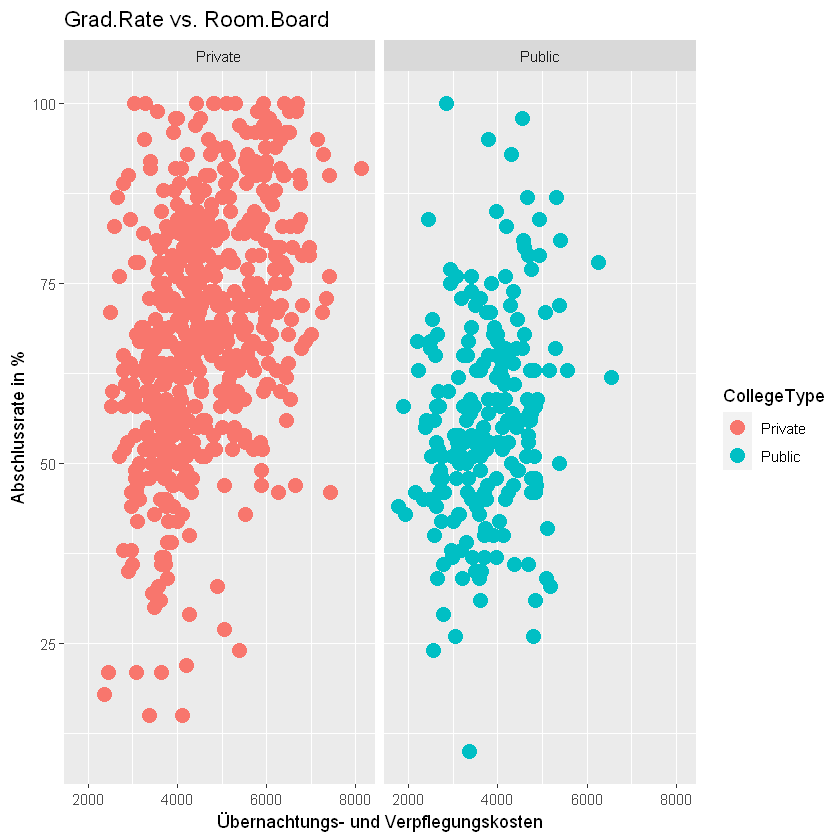

In [32]:
college_data %>% 
    ggplot(aes(Room.Board, Grad.Rate, color=CollegeType)) +
    geom_point(size = 4) +
    labs(x = "Übernachtungs- und Verpflegungskosten", 
        y="Abschlussrate in %", 
        title="Grad.Rate vs. Room.Board") +
    facet_grid(cols = vars(CollegeType))
    options(repr.plot.width =10, repr.plot.height = 10)

- Die Erfolgsquote von Private liegt bei etwa 75 %, die von Public bei etwa 65 % .
- Der Privatin-Kostenwert liegt über 4000, während der Publik-Wert unter 4000 liegt.

#### Aufgabe  
Gehen Sie vor wie in der zuvor, wobei Sie dieses Mal Scatterplots von "F.Undergrad" vs. "Outstate" erstellen.

In [33]:
df_private <- college_data %>%
                   filter(CollegeType == 'Private')
head(df_private) 

,CollegeNumber,CollegeName,CollegeType,Apps,Accept,Enroll,AbsoluteTop10perc,Top10perc,AbsoluteTop25perc,Top25perc,⋯,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,1,Abilene Christian University,Private,1660,1232,721,166,23,375,52,⋯,7440,3300,450,2200,70,78,18.1,12,7041,60
2,2,Adelphi University,Private,2186,1924,512,82,16,149,29,⋯,12280,6450,750,1500,29,30,12.2,16,10527,56
3,3,Adrian College,Private,1428,1097,336,74,22,168,50,⋯,11250,3750,400,1165,53,66,12.9,30,8735,54
4,4,Agnes Scott College,Private,417,349,137,83,60,122,89,⋯,12960,5450,450,875,92,97,7.7,37,19016,59
5,5,Alaska Pacific University,Private,193,146,55,9,16,25,44,⋯,7560,4120,800,1500,76,72,11.9,2,10922,15
6,6,Albertson College,Private,587,479,158,61,38,98,62,⋯,13500,3335,500,675,67,73,9.4,11,9727,55


In [34]:
df_public <- college_data %>%
                   filter(CollegeType == 'Public')
head(df_public) 

,CollegeNumber,CollegeName,CollegeType,Apps,Accept,Enroll,AbsoluteTop10perc,Top10perc,AbsoluteTop25perc,Top25perc,⋯,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,20,Angelo State University,Public,3540,2001,1016,244,24,549,54,⋯,5130,3592,500,2000,60,62,23.1,5,4010,34
2,22,Appalachian State University,Public,7313,4664,1910,382,20,1204,63,⋯,6806,2540,96,2000,83,96,18.3,14,5854,70
3,24,Arizona State University Main campus,Public,12809,10308,3761,903,24,1843,49,⋯,7434,4850,700,2100,88,93,18.9,5,4602,48
4,26,Arkansas Tech University,Public,1734,1729,951,115,12,495,52,⋯,3460,2650,450,1000,57,60,19.6,5,4739,48
5,28,Auburn University-Main Campus,Public,7548,6791,3070,768,25,1750,57,⋯,6300,3933,600,1908,85,91,16.7,18,6642,69
6,46,Bemidji State University,Public,1208,877,546,66,12,197,36,⋯,4425,2700,660,1800,57,62,19.6,16,3752,46


In [35]:
ggplot1 <-  ggplot(df_private, aes( Outstate, F.Undergrad )) +
        geom_point(size = 3) +
        labs(y = "Anzahl von Vollzeitstudenten ohne ersten Abschluss", 
             x = "Studiengebühren für Studenten anderer Bundesstaaten", 
             title="Vollzeitstudenten vs. Studiengebühren für Private Universität") 
#options(repr.plot.width =10, repr.plot.height = 10)

In [36]:

ggplot2 <- ggplot(df_public, aes( Outstate, F.Undergrad )) +
        geom_point(size = 3) +
        labs(y = "Anzahl von Vollzeitstudenten ohne ersten Abschluss", 
             x = "Studiengebühren für Studenten anderer Bundesstaaten", 
             title="Vollzeitstudenten vs. Studiengebühren für Öffentliche Universität") 
#options(repr.plot.width =10, repr.plot.height = 10)

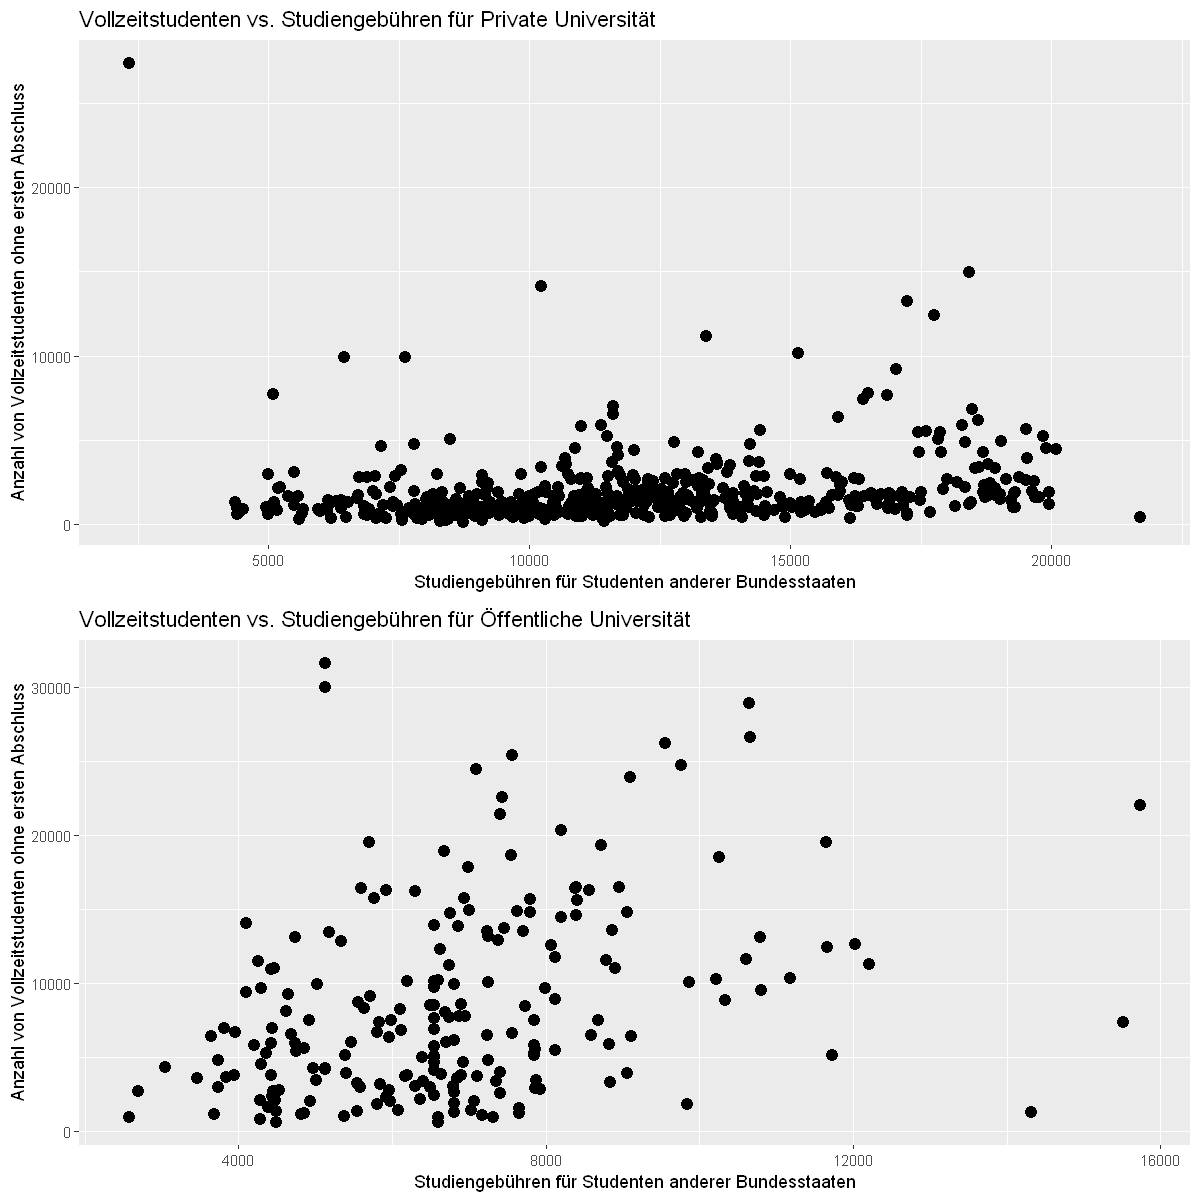

In [37]:
# Ausreise morgen diskutieren
grid.arrange(ggplot1, ggplot2,  
            ncol = 1, nrow = 2)          # Apply grid.arrange function

Public: Je höher die Studiengebühren werden, desto mehr steigt die Anzahl der Studenten, die noch ohnen ersten Abschluß (d.h. Berufsausbildung, Studium) sind. Aber es ist nur ein schwach positiver Zusammenhang.
Privat: Kein Zusammenhang erkennbar.

#### Aufgabe  
Erstellen Sie ein Histogramm für die "Out-of-State-Tuition", wobei auch hier wieder die Spalte "Private" zur Auftrennung verwendet wird.

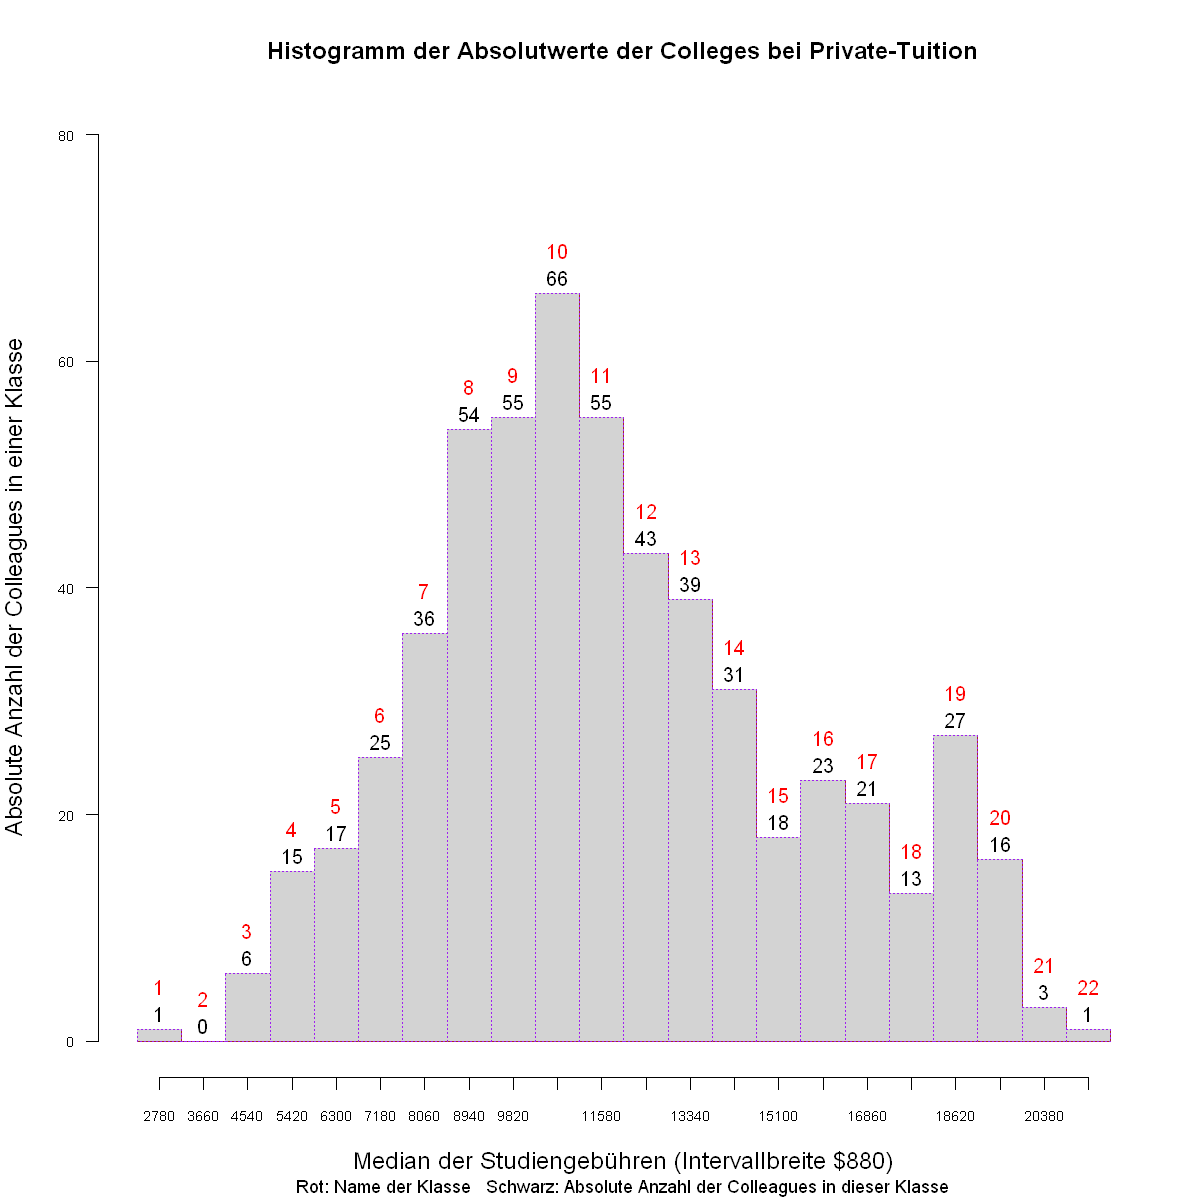

In [38]:
# Fall A: Histogramm der Absolutwerte der Colleges bei Private-Tuition

#Die Anzahl der Klasseneinteilung k orientiert sich an der
# Anzahl der Merkmalsausprägungen/Datensätze n.
# Eine günstige Klassenbreite ergibt aus
# breite= (x_max - x_min)/(1+3,32*ln(n))

limit<-length(df_private$Outstate)
small<-min(df_private$Outstate, na.rm = FALSE)
big<-max(df_private$Outstate, na.rm = FALSE)
numerator<- (big - small)
denumerator<-(1+3.32*log(limit))
width<- ceiling(numerator/denumerator) # Klassenbreite 879 Dollars bei den Outstates
borders <- seq(small,big,by=width+1)

# Das Histogramm:
par(mfrow=c(1,1),cex.axis=0.7, cex.lab=1.2, cex.main=1.2, cex.sub=0.9)
h_main <- "Histogramm der Absolutwerte der Colleges bei Private-Tuition"
h_sub <-  "Rot: Name der Klasse   Schwarz: Absolute Anzahl der Colleagues in dieser Klasse"
h_xlab <- "Median der Studiengebühren (Intervallbreite $880)"
h_ylab <- "Absolute Anzahl der Colleagues in einer Klasse"
h_max <- 80
h_color <-"lightblue"
h_border <-"brown"

h<-hist(df_private$Outstate,
        breaks=borders,
        col = h_color,
        border = h_border,
        las=2,
        xlim=c(small,big),
        ylim=c(0,h_max),
        main=h_main,
        xlab=h_xlab,
        ylab=h_ylab,
        labels = TRUE,
        freq = TRUE,
        include.lowest=TRUE,
        axes=TRUE,
        plot=TRUE,
        xaxt='n')

title(sub=h_sub)
text(h$mids,h$counts, adj = c(.5,-2.2),col = "red")
lines(h, lty = 9, border = "purple")
axis(side=1, at=h$mids, labels=h$mids)

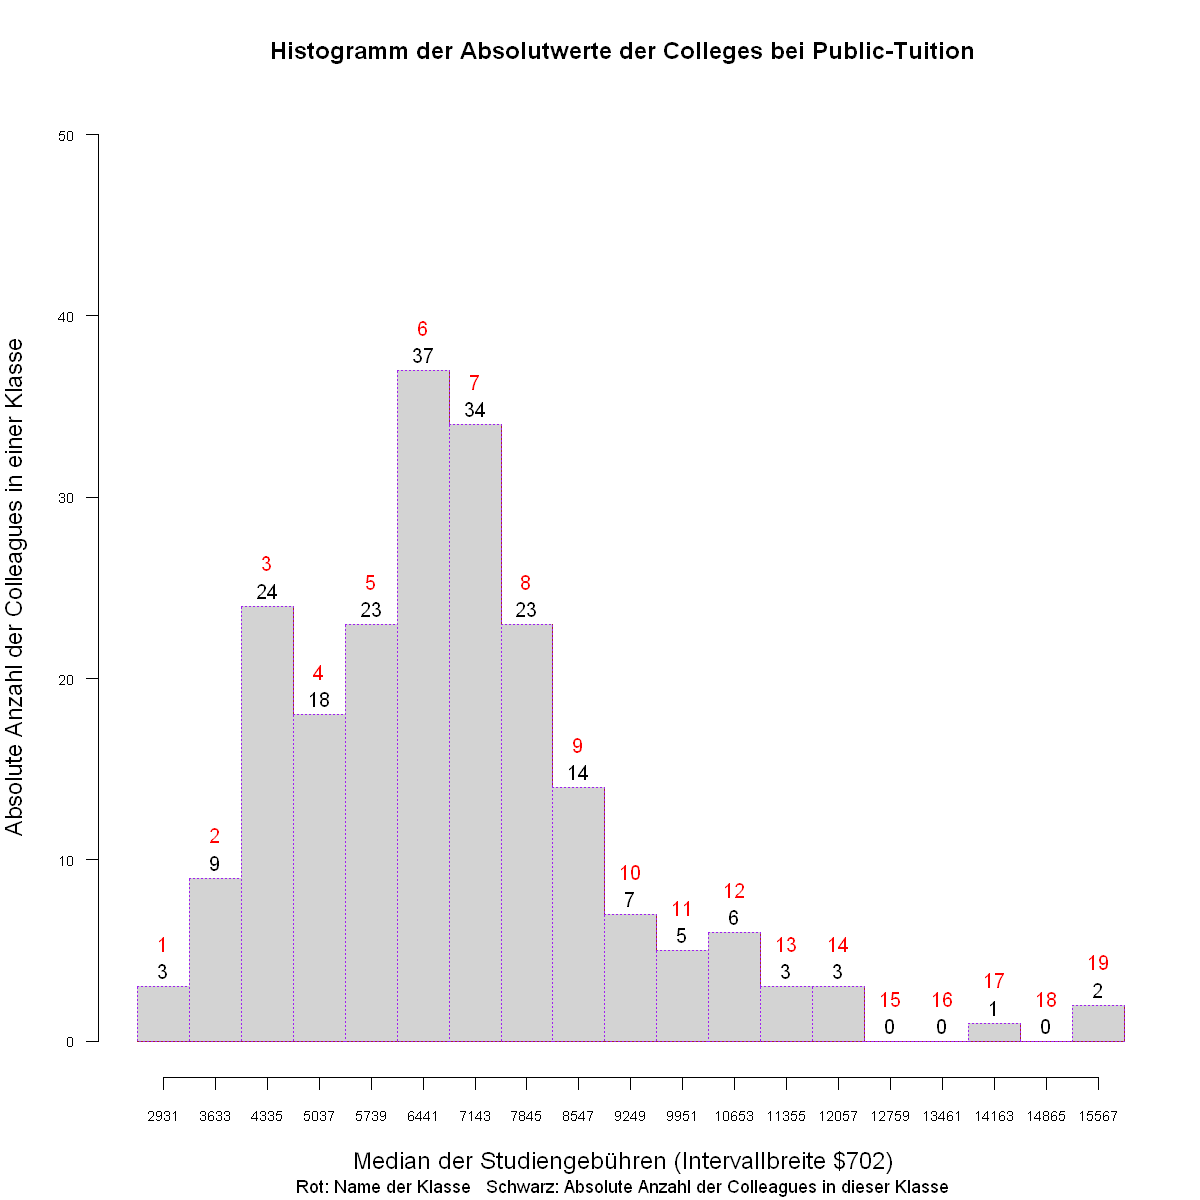

In [39]:
#Die Anzahl der Klasseneinteilung k orientiert sich an der
# Anzahl der Merkmalsausprägungen/Datensätze n.
# Eine günstige Klassenbreite ergibt aus
# breite= (x_max - x_min)/(1+3,32*ln(n))

limit<-length(df_public$Outstate)
small<-min(df_public$Outstate, na.rm = FALSE)
big<-max(df_public$Outstate, na.rm = FALSE)
numerator<- (big - small)
denumerator<-(1+3.32*log(limit))
width<- ceiling(numerator/denumerator) # Klassenbreite 701 Dollars bei den Outstates
borders <- seq(small,big+800,by=width+1)


# Das Histogramm:
par(mfrow=c(1,1),cex.axis=0.7, cex.lab=1.2, cex.main=1.2, cex.sub=0.9)
h_main <- "Histogramm der Absolutwerte der Colleges bei Public-Tuition"
h_sub <-  "Rot: Name der Klasse   Schwarz: Absolute Anzahl der Colleagues in dieser Klasse"
h_xlab <- "Median der Studiengebühren (Intervallbreite $702)"
h_ylab <- "Absolute Anzahl der Colleagues in einer Klasse"
h_max <- 50
h_color <-"lightblue"
h_border <-"brown"


h<-hist(df_public$Outstate,
        breaks=borders,
        col = h_color,
        border = h_border,
        las=2,
        xlim=c(small,big),
        ylim=c(0,h_max),
        main=h_main,
        xlab=h_xlab,
        ylab=h_ylab,
        labels = TRUE,
        freq = TRUE,
        include.lowest=TRUE,
        axes=TRUE,
        plot=TRUE,
        xaxt='n')

title(sub=h_sub)
text(h$mids,h$counts, adj = c(.5,-2.2),col = "red")
#text(h$mids,h$counts,labels = h$counts, adj = c(.5,-2.2),col = "red")
lines(h, lty = 9, border = "purple")
axis(side=1, at=h$mids, labels=h$mids)

#### Aufgabe  
Erstellen Sie dasselbe Histogramm wie in der letzten Aufgabe jetzt für die Abschlussrate (anstatt "Tuition").

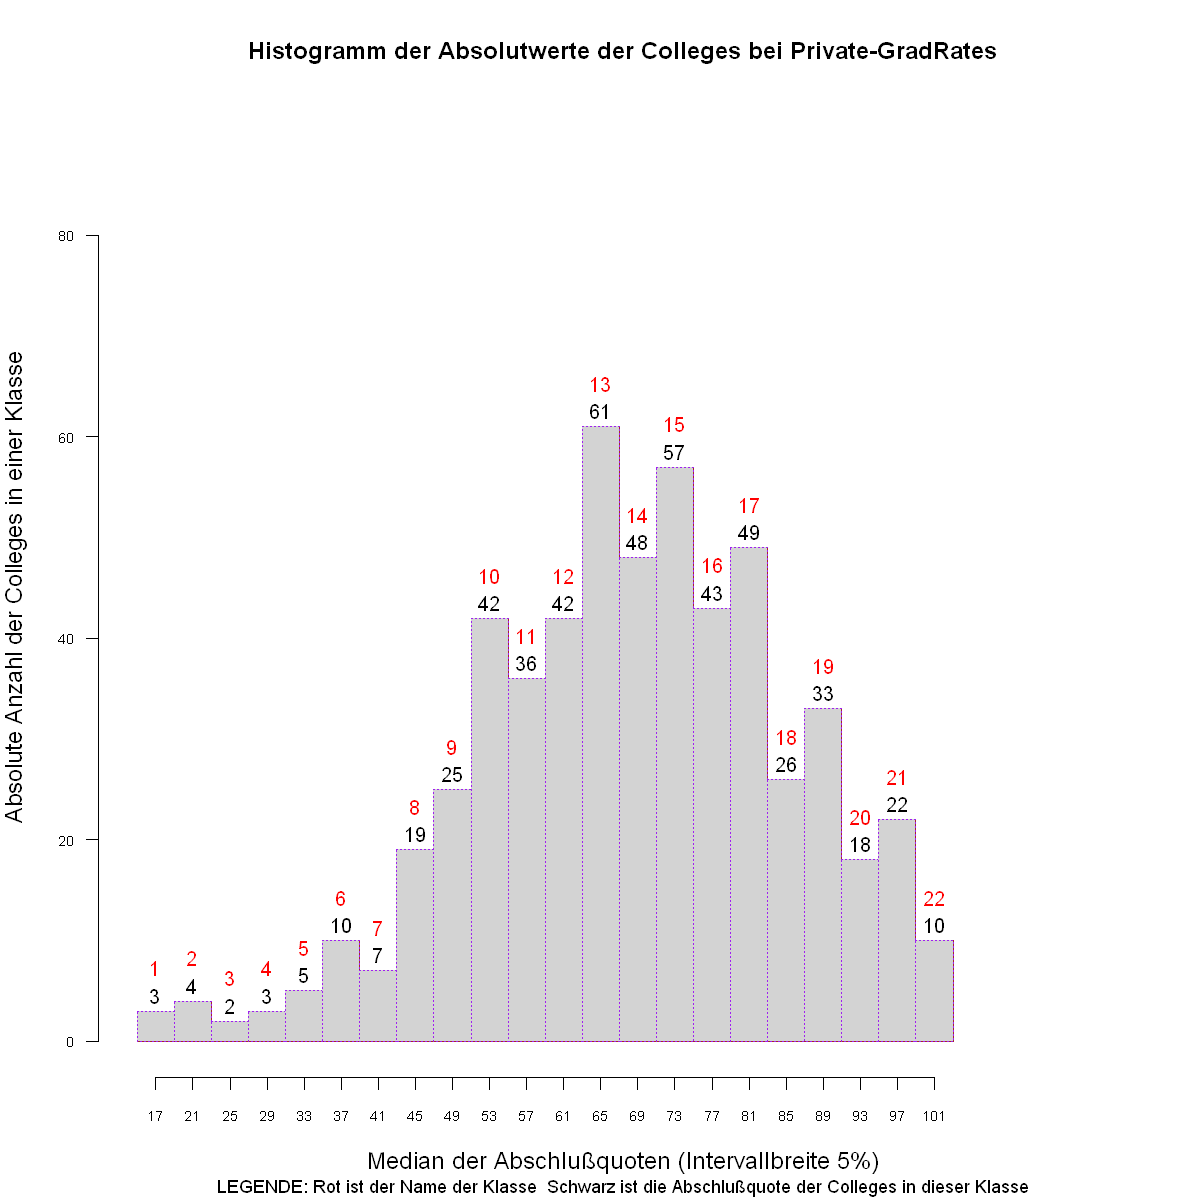

In [40]:
# Bitte  "Grad_Rate" in eurem coding in "Grad.Rate" umbenennen !!!

# Fall A: Histogramm der Absolutwerte der Colleges bei Private-GradRates

#Klasseneinteilung:
limit<-length(df_private$Grad.Rate)
small<-min(df_private$Grad.Rate, na.rm = FALSE)
big<-max(df_private$Grad.Rate, na.rm = FALSE)
numerator<- (big - small)
denumerator<-(1+3.32*log(limit))
width<- ceiling(numerator/denumerator) # Klassenbreite ist 5% bei den Grad-Rates
borders <- seq(small,big+5,by=width)

# Das Histogramm:
par(mfrow=c(1,1),cex.axis=0.7, cex.lab=1.2, cex.main=1.2, cex.sub=0.9)
h_main <- "Histogramm der Absolutwerte der Colleges bei Private-GradRates"
h_sub <-  "LEGENDE: Rot ist der Name der Klasse  Schwarz ist die Abschlußquote der Colleges in dieser Klasse"
h_xlab <- "Median der Abschlußquoten (Intervallbreite 5%)"
h_ylab <- "Absolute Anzahl der Colleges in einer Klasse"
h_max <- 90
h_color <-"lightblue"
h_border <-"brown"

h<-hist(df_private$Grad.Rate,
        breaks=borders,
        col = h_color,
        border = h_border,
        las=2,
        xlim=c(small,big+20),
        ylim=c(0,h_max),
        main=h_main,
        xlab=h_xlab,
        ylab=h_ylab,
        labels = TRUE,
        freq = TRUE,
        include.lowest=TRUE,
        axes=TRUE,
        plot=TRUE,
        xaxt='n')

title(sub=h_sub)
text(h$mids,h$counts, adj = c(.5,-2.2),col = "red")
lines(h, lty = 9, border = "purple")
axis(side=1, at=h$mids, labels=h$mids)


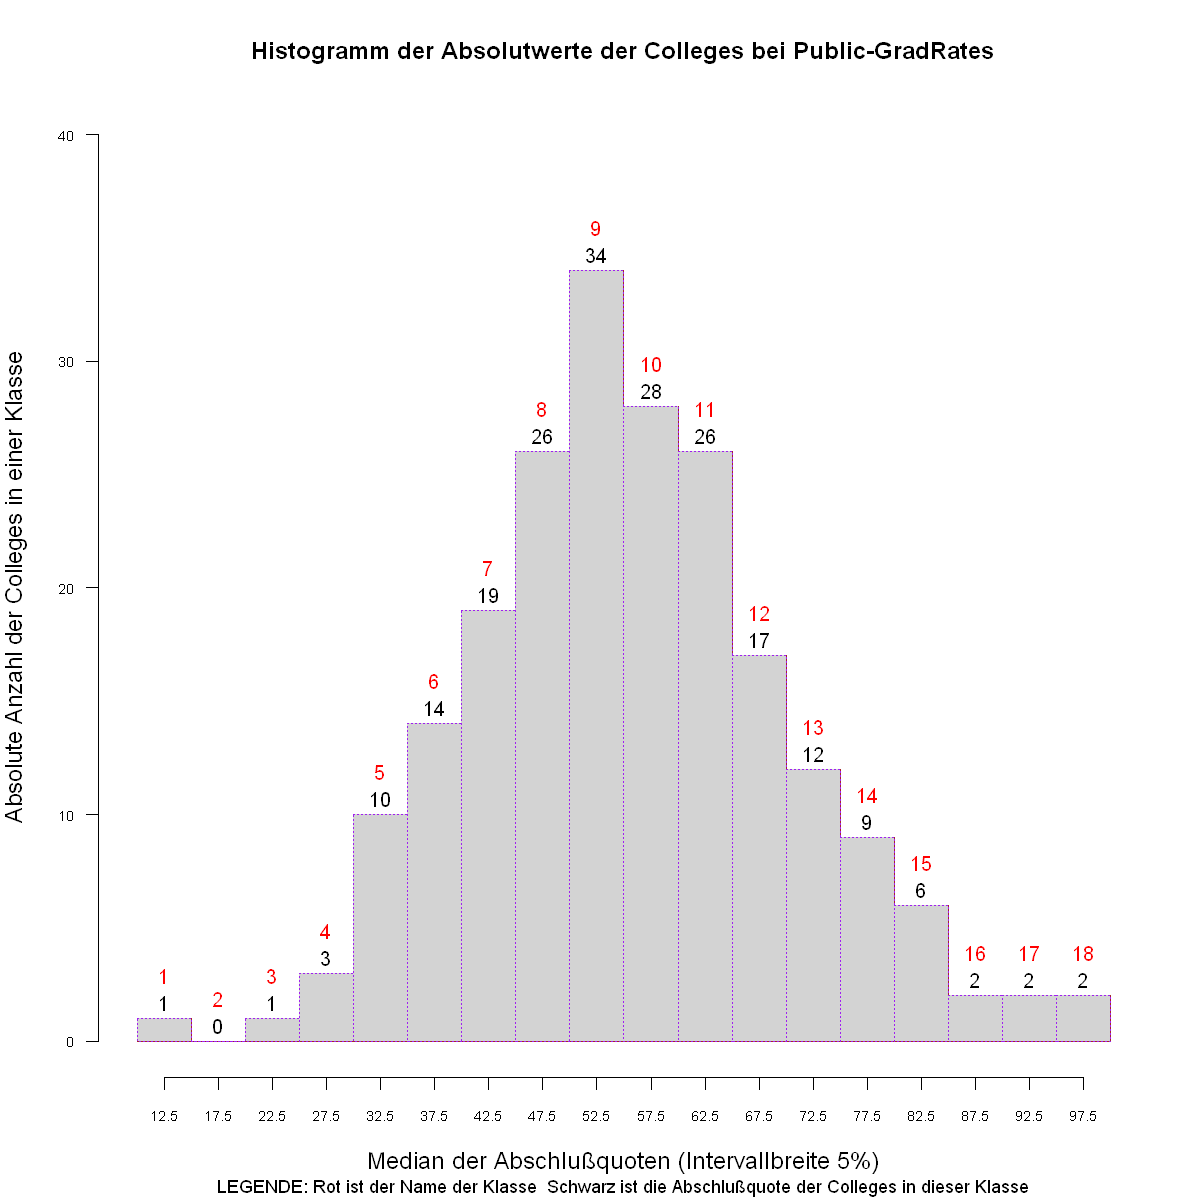

In [41]:
#Klasseneinteilung:
limit<-length(df_public$Grad.Rate)
small<-min(df_public$Grad.Rate, na.rm = FALSE)
big<-max(df_public$Grad.Rate, na.rm = FALSE)
numerator<- (big - small)
denumerator<-(1+3.32*log(limit))
width<- ceiling(numerator/denumerator) # Klassenbreite ist 5% bei den Grad-Rates
borders <- seq(small,big,by=width)


# Das Histogramm:
par(mfrow=c(1,1),cex.axis=0.7, cex.lab=1.2, cex.main=1.2, cex.sub=0.9)
h_main <- "Histogramm der Absolutwerte der Colleges bei Public-GradRates"
h_sub <-  "LEGENDE: Rot ist der Name der Klasse  Schwarz ist die Abschlußquote der Colleges in dieser Klasse"
h_xlab <- "Median der Abschlußquoten (Intervallbreite 5%)"
h_ylab <- "Absolute Anzahl der Colleges in einer Klasse"
h_max <- 40
h_color <-"lightblue"
h_border <-"brown"


h<-hist(df_public$Grad.Rate,
        breaks=borders,
        col = h_color,
        border = h_border,
        las=2,
        xlim=c(small,big),
        ylim=c(0,h_max),
        main=h_main,
        xlab=h_xlab,
        ylab=h_ylab,
        labels = TRUE,
        freq = TRUE,
        include.lowest=TRUE,
        axes=TRUE,
        plot=TRUE,
        xaxt='n')

title(sub=h_sub)
text(h$mids,h$counts, adj = c(.5,-2.2),col = "red")
#text(h$mids,h$counts,labels = h$counts, adj = c(.5,-2.2),col = "red")
lines(h, lty = 9, border = "purple")
axis(side=1, at=h$mids, labels=h$mids)


#### Aufgabe  
Erzeugen Sie sich einen Pairplot und speichern Sie ihn als png-Datei zur weiteren Inspektion ab. Können Sie die Punkte einfärben, um wieder zwischen privat/öffentlich zu unterscheiden?

In [42]:
names(college_data)

[1] "CollegeNumber"     "CollegeName"       "CollegeType"      
 [4] "Apps"              "Accept"            "Enroll"           
 [7] "AbsoluteTop10perc" "Top10perc"         "AbsoluteTop25perc"
[10] "Top25perc"         "F.Undergrad"       "P.Undergrad"      
[13] "Outstate"          "Room.Board"        "Books"            
[16] "Personal"          "PhD"               "Terminal"         
[19] "S.F.Ratio"         "perc.alumni"       "Expend"           
[22] "Grad.Rate"

In [43]:
college_data_ggp <- college_data[,-c(1:2, 7, 9)]
names(college_data_ggp)

[1] "CollegeType" "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

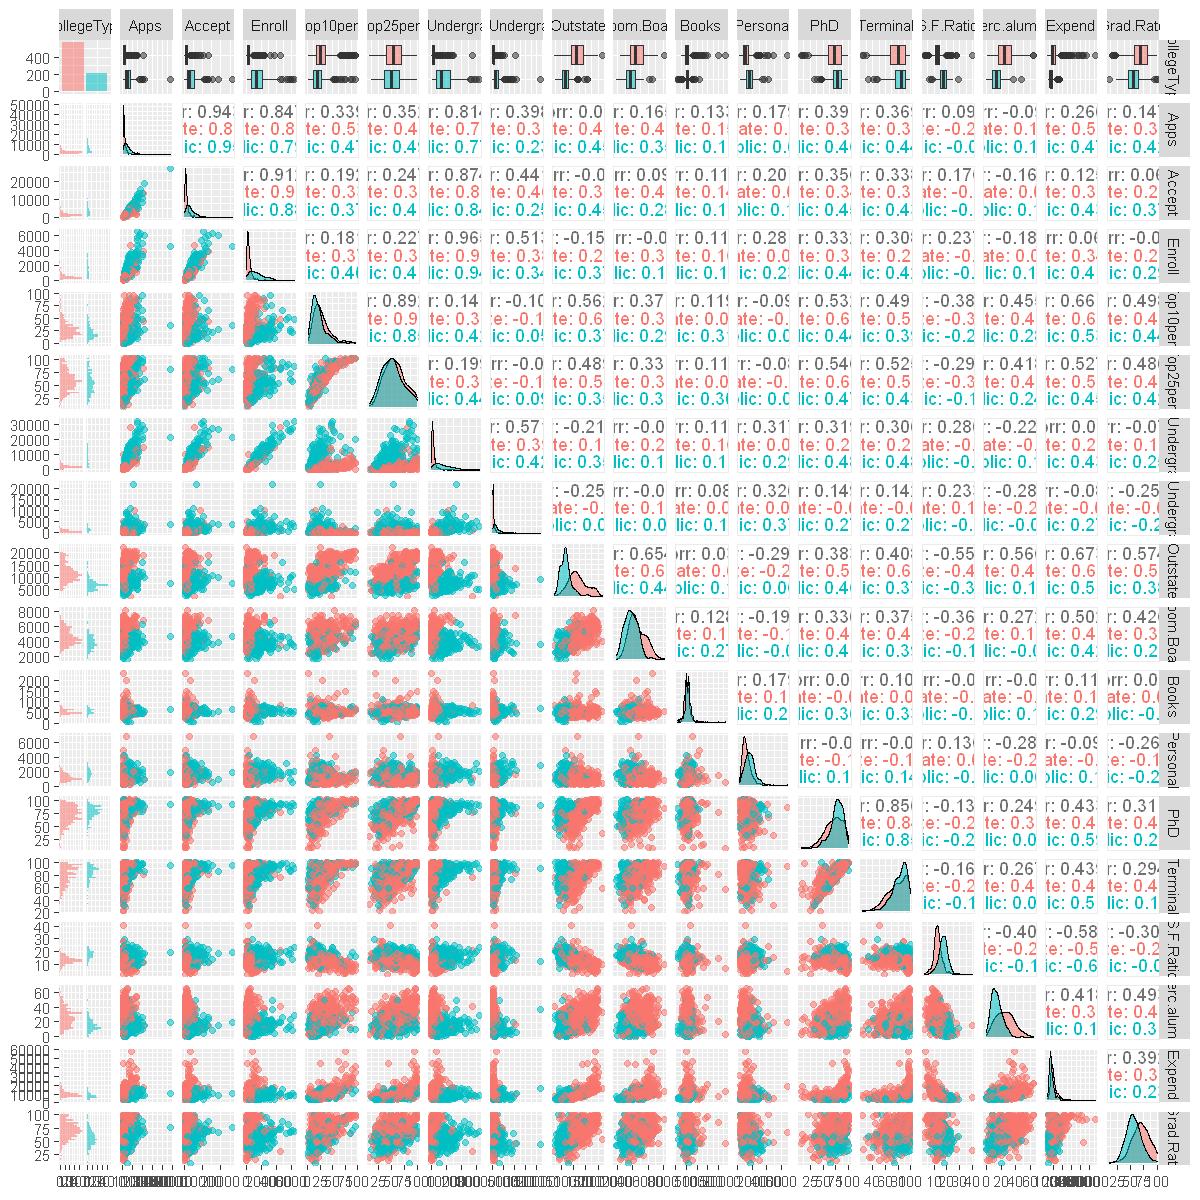

In [44]:
GGally::ggpairs(college_data_ggp, aes(colour = CollegeType, alpha = 0.4))
ggsave("pair_pic.png", width = 70, height = 70, units = "cm")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



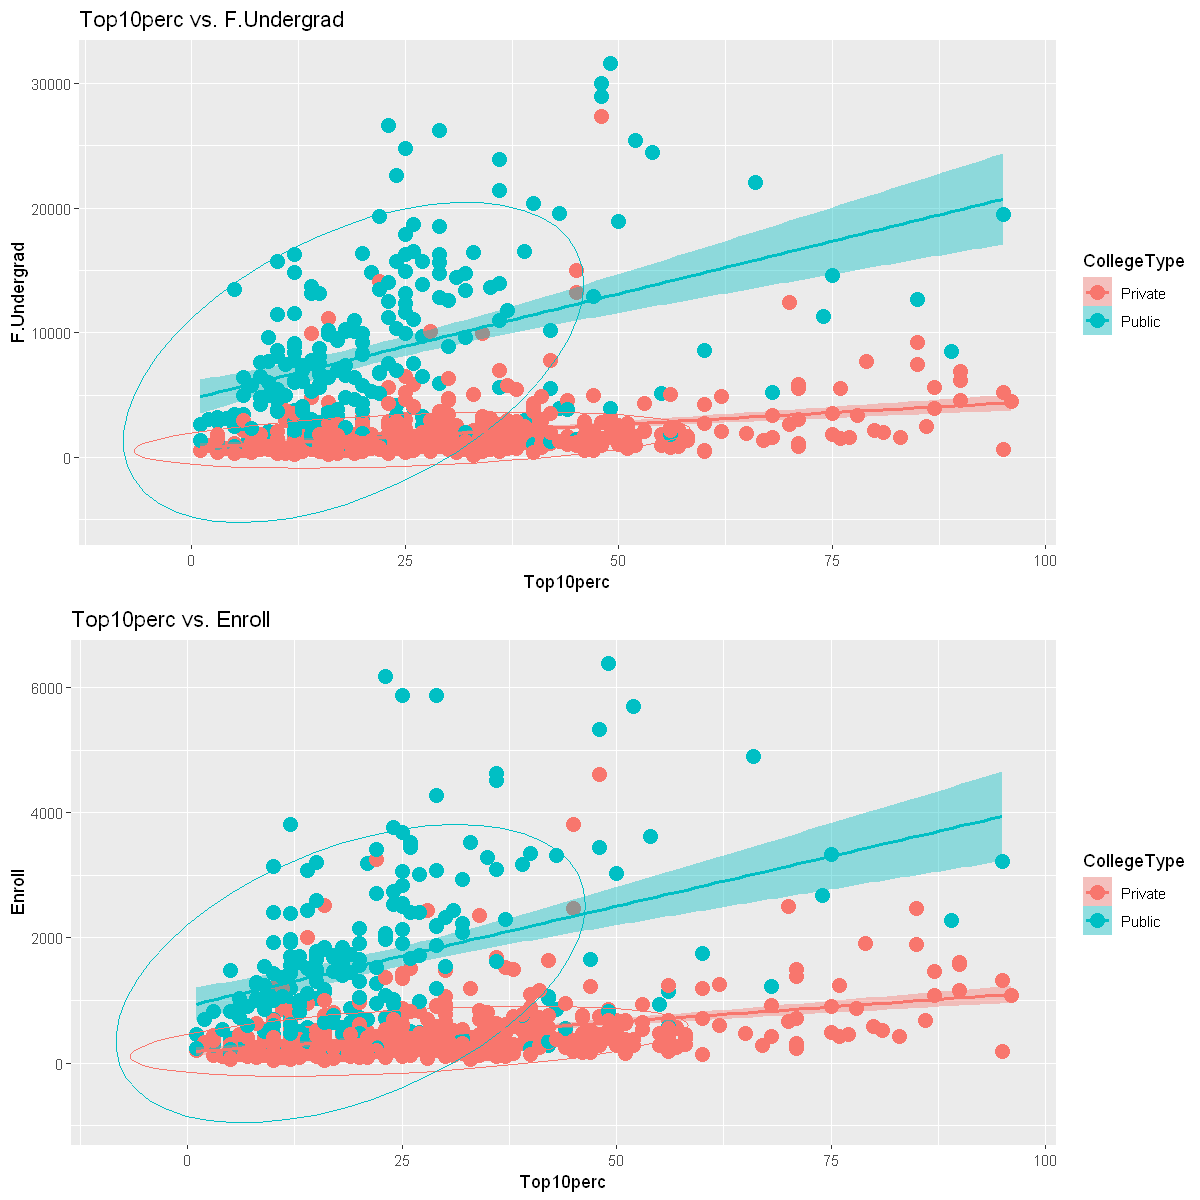

In [45]:
# Private und Public difference for Top10perc and F.Undergrad
ggtop101 <- ggplot(college_data_ggp, aes(x=Top10perc, y=F.Undergrad, color=CollegeType)) + 
geom_point(size=4) +
stat_ellipse() +
labs(title="Top10perc vs. F.Undergrad") +
geom_smooth(method=lm,  aes(fill=CollegeType, color=CollegeType))

# Private und Public difference for Top10perc and Enroll
ggtop102 <- ggplot(college_data_ggp, aes(x=Top10perc, y=Enroll, color=CollegeType)) + 
geom_point(size=4) +
stat_ellipse() +
labs(title="Top10perc vs. Enroll") +
geom_smooth(method=lm,  aes(fill=CollegeType, color=CollegeType))

grid.arrange(ggtop101, ggtop102,  
            ncol = 1, nrow = 2)          # Apply grid.arrange function

Ergebnisse:
  - Eingeschriebene Studierende werden meist bis zu 50% verteilt. In diesem Bereich sind viele eingeschriebene öffentliche Studenten. Wenn wir uns 50-100% der öffentlichen Hochschulen ansehen, ist die Einschreibung nicht so hoch wie bei den privaten Hochschulen.
  - Gleiches gilt für die F.Bachelor-Studenten.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



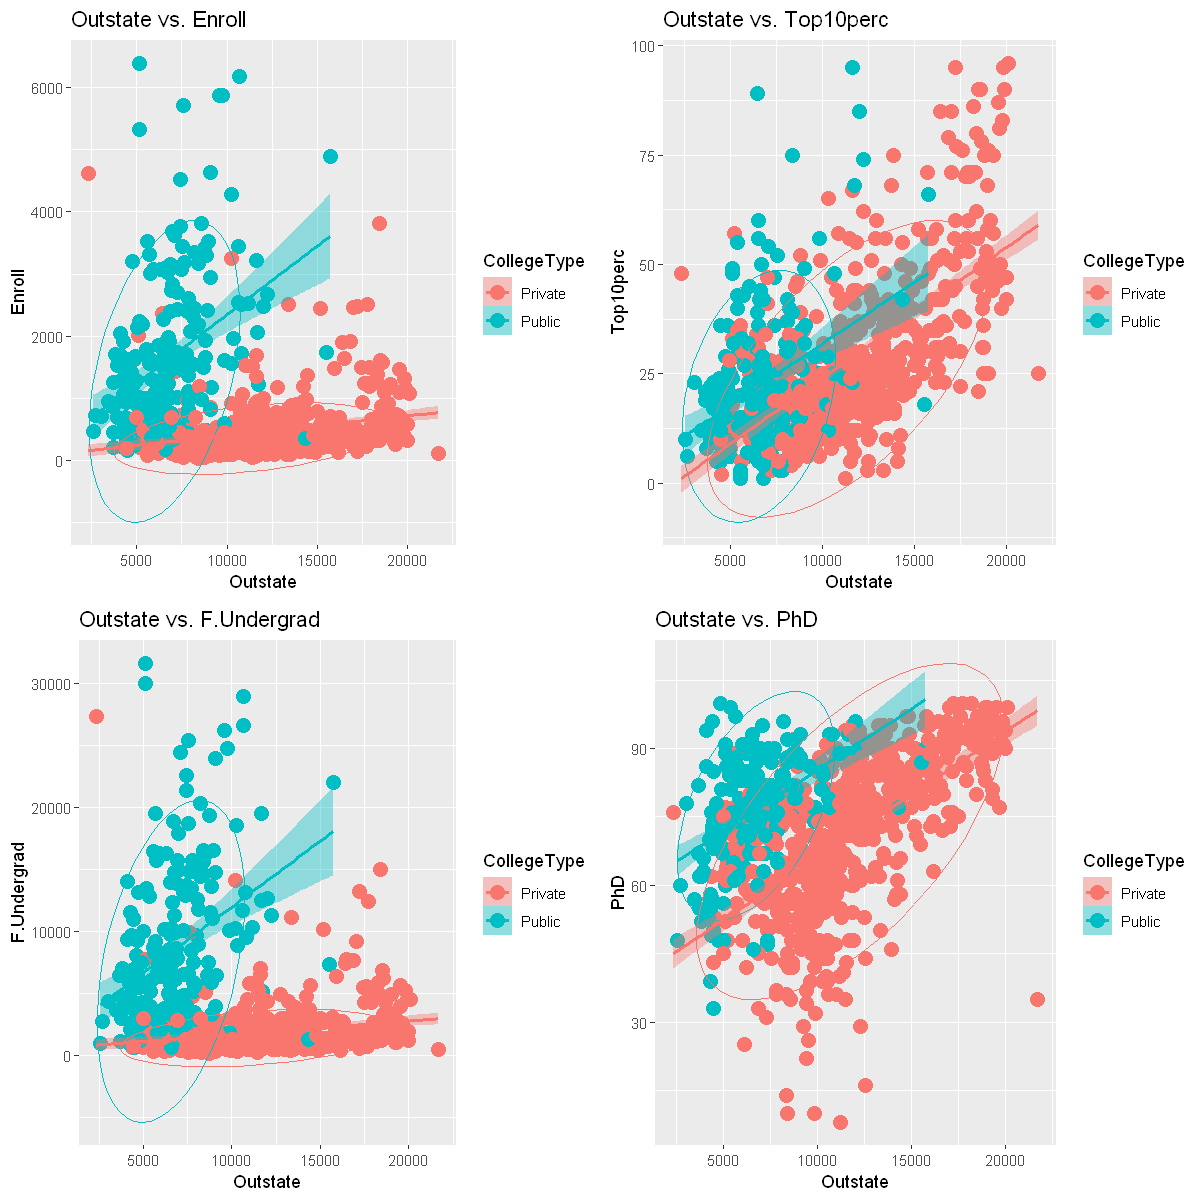

In [46]:
# Private und Public difference for Outstate and F.Undergrad
ggas1 <- ggplot(college_data_ggp, aes(x=Outstate, y=Enroll, color=CollegeType)) + 
geom_point(size=4) +
stat_ellipse() +    
labs(title="Outstate vs. Enroll") +
geom_smooth(method=lm,  aes(fill=CollegeType, color=CollegeType))

# Private und Public difference for Outstate and Enroll
ggas2 <- ggplot(college_data_ggp, aes(x=Outstate, y=Top10perc, color=CollegeType)) + 
geom_point(size=4) +
stat_ellipse() +    
labs(title="Outstate vs. Top10perc") +
geom_smooth(method=lm,  aes(fill=CollegeType, color=CollegeType))

# Private und Public difference for Outstate and Top10perc
ggas3 <- ggplot(college_data_ggp, aes(x=Outstate, y=F.Undergrad, color=CollegeType)) + 
geom_point(size=4) +
stat_ellipse() +    
labs(title="Outstate vs. F.Undergrad") +
geom_smooth(method=lm,  aes(fill=CollegeType, color=CollegeType))

# Private und Public difference for Outstate and F.Undergrad
ggas4 <- ggplot(college_data_ggp, aes(x=Outstate, y=PhD, color=CollegeType)) + 
geom_point(size=4) +
stat_ellipse() +    
labs(title="Outstate vs. PhD") +
geom_smooth(method=lm,  aes(fill=CollegeType, color=CollegeType))

grid.arrange(ggas1, ggas2, ggas3, ggas4,
            ncol = 2, nrow = 2)          # Apply grid.arrange function

Ergebnisse:
  - Die Einschreibungen an öffentlichen Schulen sind hoch, aber bis 12000 für außerstaatliche Nachhilfe. Die Einschreibungen an Privatschulen sind nicht hoch gezählt, aber sie werden auch bis 20000 für die überstaatlichen Werte gefunden.
   - Gleiches gilt für Top 10 Prozent, PhD und F.Undergraduates. Nach 12000 gibt es fast nur noch private Top 10 Studenten.
   - Unterschiedliche Dichte zwischen Privat und Öffentlich kann auch für andere geldbezogene Werte wie Room.Board, Books, Personal, PhD, Terminal, perc.alumni, Expend angezeigt werden

#### Aufgabe  
Erzeugen Sie eine Korrelationsmatrix (Heatmap). Hierfür müssen Sie unter Umständen einen reduzierten Datensatz erstellen, der ausschließlich numerische Merkmale enthält. Dabei können Sie sich an Ihrer ersten Analyse des Datensatzes von oben orientieren.

In [47]:
df_private_num <- df_private %>% 
                  select(Apps, Accept, Enroll, Outstate, Room.Board, 
                           Books,Personal, Expend) 
head(df_private_num)

,Apps,Accept,Enroll,Outstate,Room.Board,Books,Personal,Expend
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1660,1232,721,7440,3300,450,2200,7041
2,2186,1924,512,12280,6450,750,1500,10527
3,1428,1097,336,11250,3750,400,1165,8735
4,417,349,137,12960,5450,450,875,19016
5,193,146,55,7560,4120,800,1500,10922
6,587,479,158,13500,3335,500,675,9727


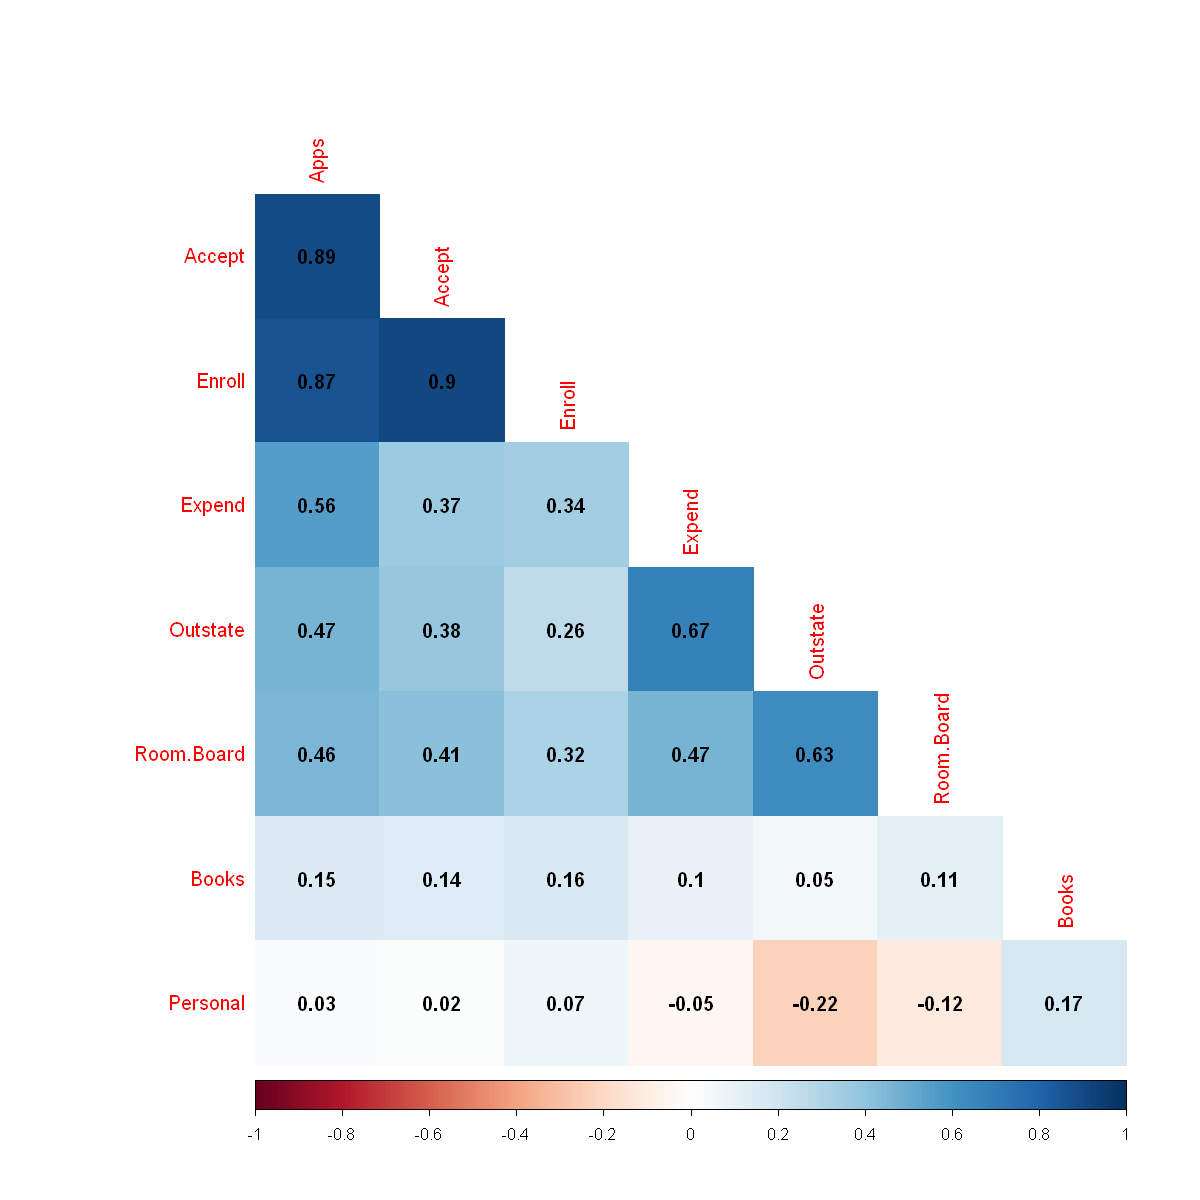

In [48]:
corrplot(cor(df_private_num), method = "color", addCoef.col = "black", order = 'FPC', type = 'lower', diag = FALSE)

In [49]:
df_public_num <- df_public %>% 
                  select(Apps, Accept, Enroll, Outstate, Room.Board, 
                           Books,Personal, Expend) 
head(df_public_num)

,Apps,Accept,Enroll,Outstate,Room.Board,Books,Personal,Expend
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3540,2001,1016,5130,3592,500,2000,4010
2,7313,4664,1910,6806,2540,96,2000,5854
3,12809,10308,3761,7434,4850,700,2100,4602
4,1734,1729,951,3460,2650,450,1000,4739
5,7548,6791,3070,6300,3933,600,1908,6642
6,1208,877,546,4425,2700,660,1800,3752


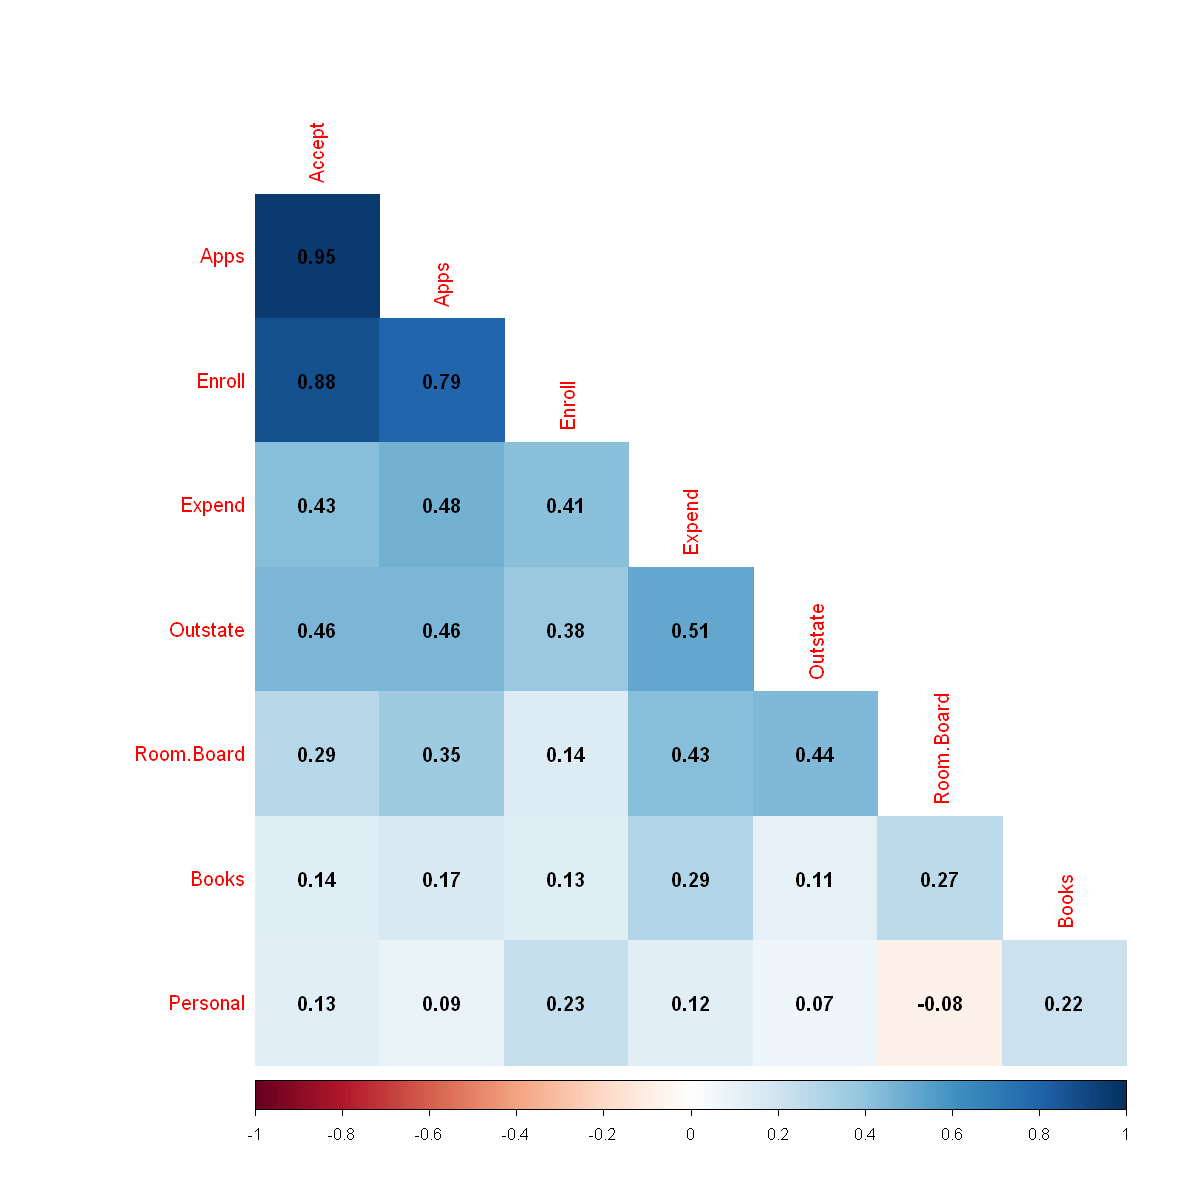

In [50]:
corrplot(cor(df_public_num), method = "color", addCoef.col = "black", order = 'FPC', type = 'lower', diag = FALSE)

<div class="alert alert-block alert-warning"><b>Aufgabe</b><br>
Für den Präsentationsteil sollten Sie noch weitere Untersuchungen auf eigene Faust vornehmen. Werden Sie kreativ und denken Sie sich in das Problem hinein! Am Ende sollten Sie angeben, erläutern und begründen können, welche Merkmale Ihrer Ansicht nach für den Studienerfolg entscheidend sind.

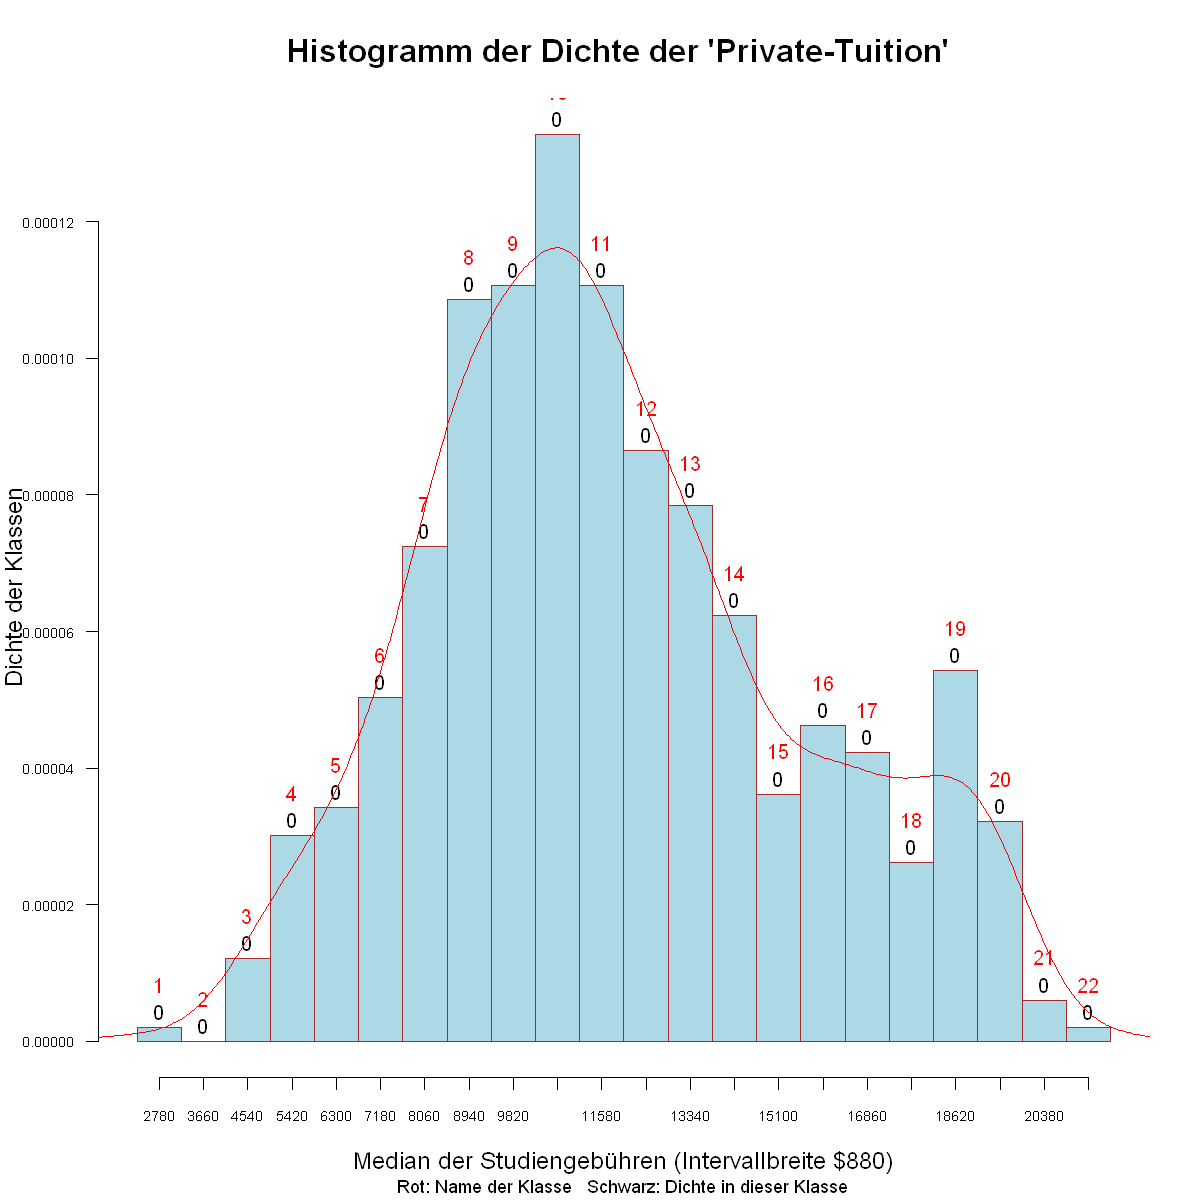

In [51]:
# Fall A: Histogramm der Dichten der Private-Tuition

#Klasseneinteilung:
limit<-length(df_private$Outstate)
small<-min(df_private$Outstate, na.rm = FALSE)
big<-max(df_private$Outstate, na.rm = FALSE)
numerator<- (big - small)
denumerator<-(1+3.32*log(limit))
width<- ceiling(numerator/denumerator) # Klassenbreite 879 Dollars bei den Outstates
borders <- seq(small,big,by=width+1)

# Das Histogramm:
par(mfrow=c(1,1),cex.axis=0.7, cex.lab=1.2, cex.main=1.6, cex.sub=0.9)
h_main <- "Histogramm der Dichte der 'Private-Tuition' "
h_sub <-  "Rot: Name der Klasse   Schwarz: Dichte in dieser Klasse"
h_xlab <- "Median der Studiengebühren (Intervallbreite $880)"
h_ylab <- "Dichte der Klassen"
h_color <-"lightblue"
h_border <-"brown"

h<-hist(df_private$Outstate,
        breaks=borders,
        col = h_color,
        border = h_border,
        las=2,
        xlim=c(small,big),
        main=h_main,
        xlab=h_xlab,
        ylab=h_ylab,
        labels = TRUE,
        freq=FALSE,
        include.lowest=TRUE,
        axes=TRUE,
        plot=TRUE,
        xaxt='n')

text(h$mids,h$density, adj = c(.5,-2.2),col = "red")
title(sub=h_sub)
axis(side=1, at=h$mids, labels=h$mids)
lines(density(df_private$Outstate), col = "red")

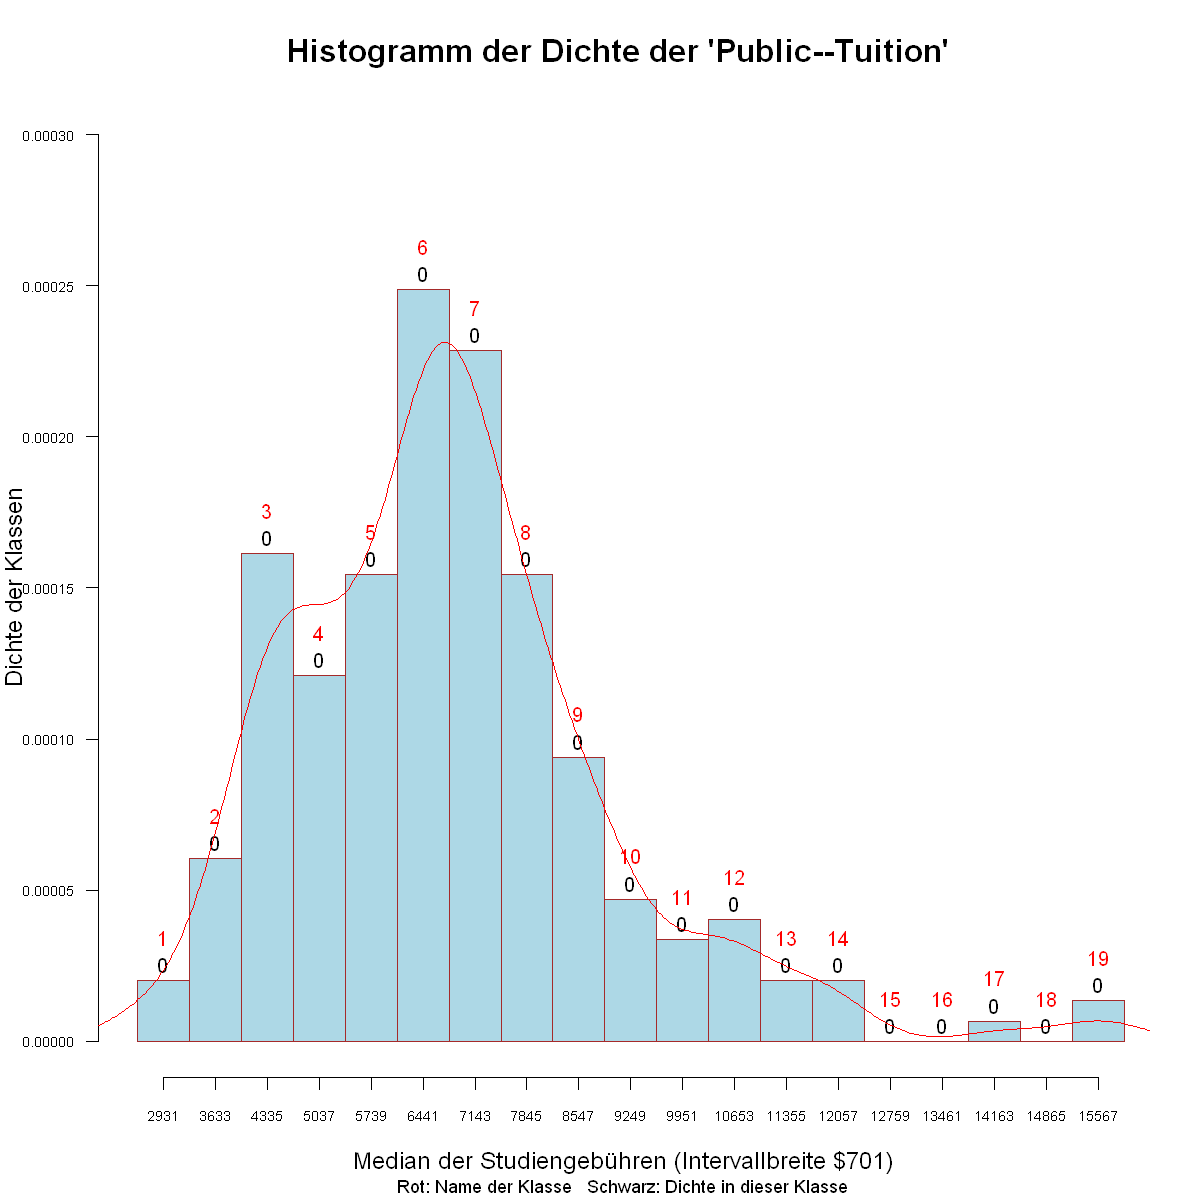

In [52]:
# Fall B: Histogramm der Dichten der Public-Tuition

#Klasseneinteilung:
limit<-length(df_public$Outstate)
small<-min(df_public$Outstate, na.rm = FALSE)
big<-max(df_public$Outstate, na.rm = FALSE)
numerator<- (big - small)
denumerator<-(1+3.32*log(limit))
width<- ceiling(numerator/denumerator) # Klassenbreite bei den Outstates
borders <- seq(small,big+800,by=width+1)

# Das Histogramm:
par(mfrow=c(1,1),cex.axis=0.7, cex.lab=1.2, cex.main=1.6, cex.sub=0.9)
h_main <- "Histogramm der Dichte der 'Public--Tuition' "
h_sub <-  "Rot: Name der Klasse   Schwarz: Dichte in dieser Klasse"
h_xlab <- "Median der Studiengebühren (Intervallbreite $701)"
h_ylab <- "Dichte der Klassen"
h_max <- 0.00030
h_color <-"lightblue"
h_border <-"brown"

h<-hist(df_public$Outstate,
        breaks=borders,
        col = h_color,
        border = h_border,
        las=2,
        xlim=c(small,big),
        ylim=c(0,h_max),
        main=h_main,
        xlab=h_xlab,
        ylab=h_ylab,
        labels = TRUE,
        freq=FALSE,
        include.lowest=TRUE,
        axes=TRUE,
        plot=TRUE,
        xaxt='n')

text(h$mids,h$density, adj = c(.5,-2.2),col = "red")
title(sub=h_sub)
axis(side=1, at=h$mids, labels=h$mids)
lines(density(df_public$Outstate), col = "red")

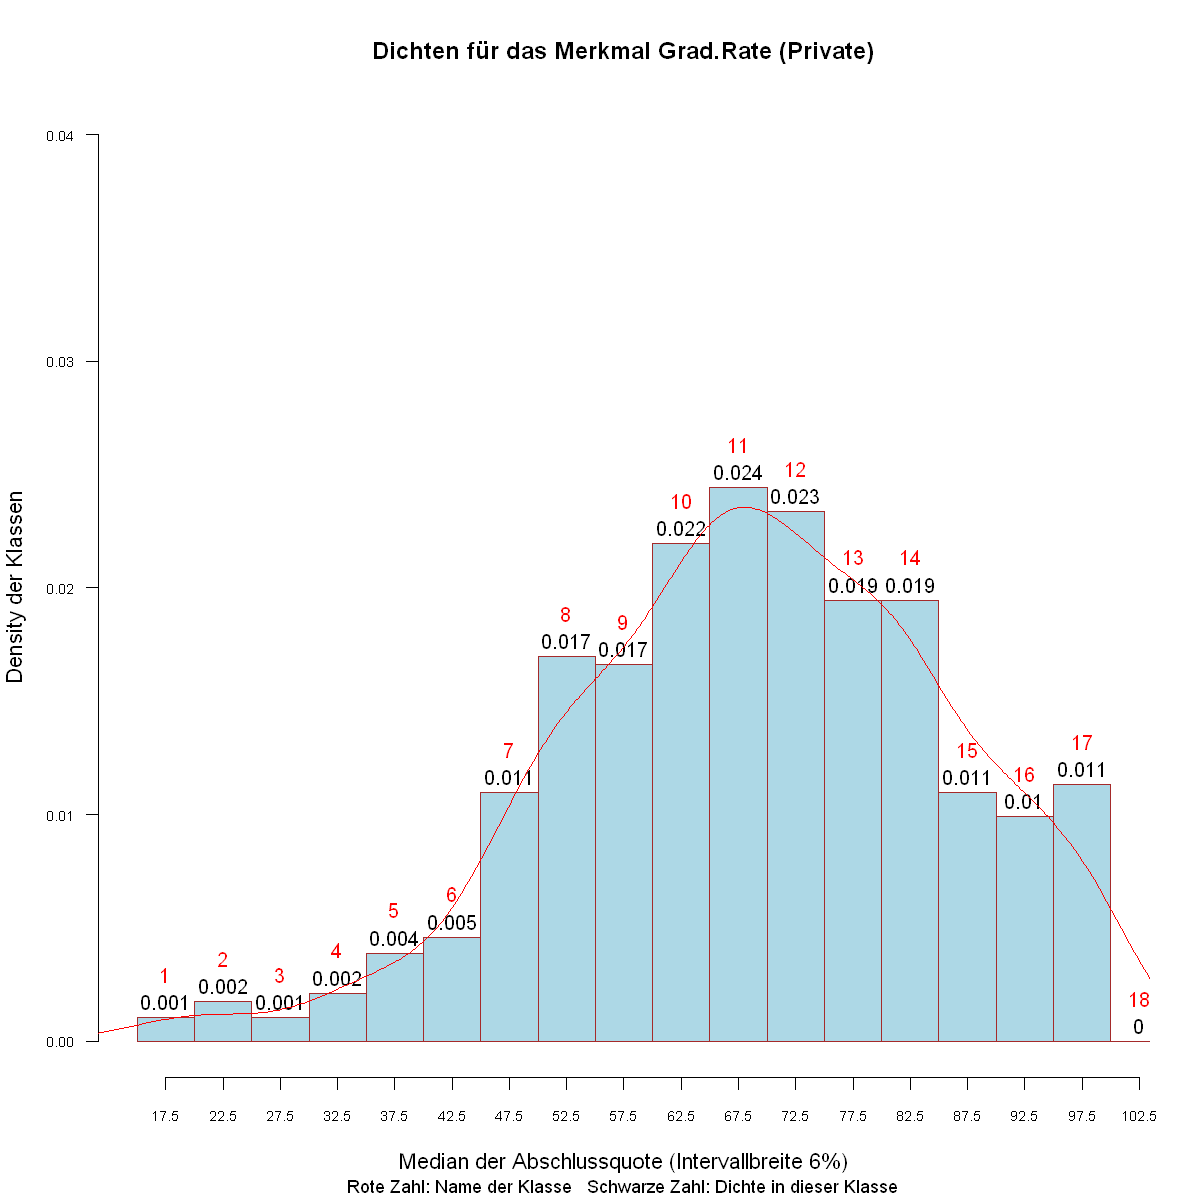

In [53]:
# Fall A: Dichten für das Merkmal Grad.Rate (Private)

#Klasseneinteilung:
limit<-length(df_private$Grad.Rate)
small<-min(df_private$Grad.Rate, na.rm = FALSE)
big<-max(df_private$Grad.Rate, na.rm = FALSE)
numerator<- (big - small)
denumerator<-(1+3.32*log(limit))
width<- ceiling(numerator/denumerator)  # errechnete Breite 5%
borders <- seq(small,big+5,by=width+1)  # angepasste Breite 6%

# Das Histogramm:
par(mfrow=c(1,1),cex.axis=0.7, cex.lab=1.1, cex.main=1.2, cex.sub=0.9)
h_main <- "Dichten für das Merkmal Grad.Rate (Private)"
h_sub <-  "Rote Zahl: Name der Klasse   Schwarze Zahl: Dichte in dieser Klasse"
h_xlab <- "Median der Abschlussquote (Intervallbreite 6%)"
h_ylab <- "Density der Klassen"
h_max <- 0.04
h_color <-"lightblue"
h_border <-"brown"

h<-hist(df_private$Grad.Rate,
        breaks=borders,
        col = h_color,
        border = h_border,
        las=2,
        xlim=c(small,big),
        ylim=c(0,h_max),
        main=h_main,
        xlab=h_xlab,
        ylab=h_ylab,
        labels = TRUE,
        freq=FALSE,
        include.lowest=TRUE,
        axes=TRUE,
        plot=TRUE,
        xaxt='n')

text(h$mids,h$density, adj = c(.5,-2.2),col = "red")
title(sub=h_sub)
axis(side=1, at=h$mids, labels=h$mids)
lines(density(df_private$Grad.Rate), col = "red")

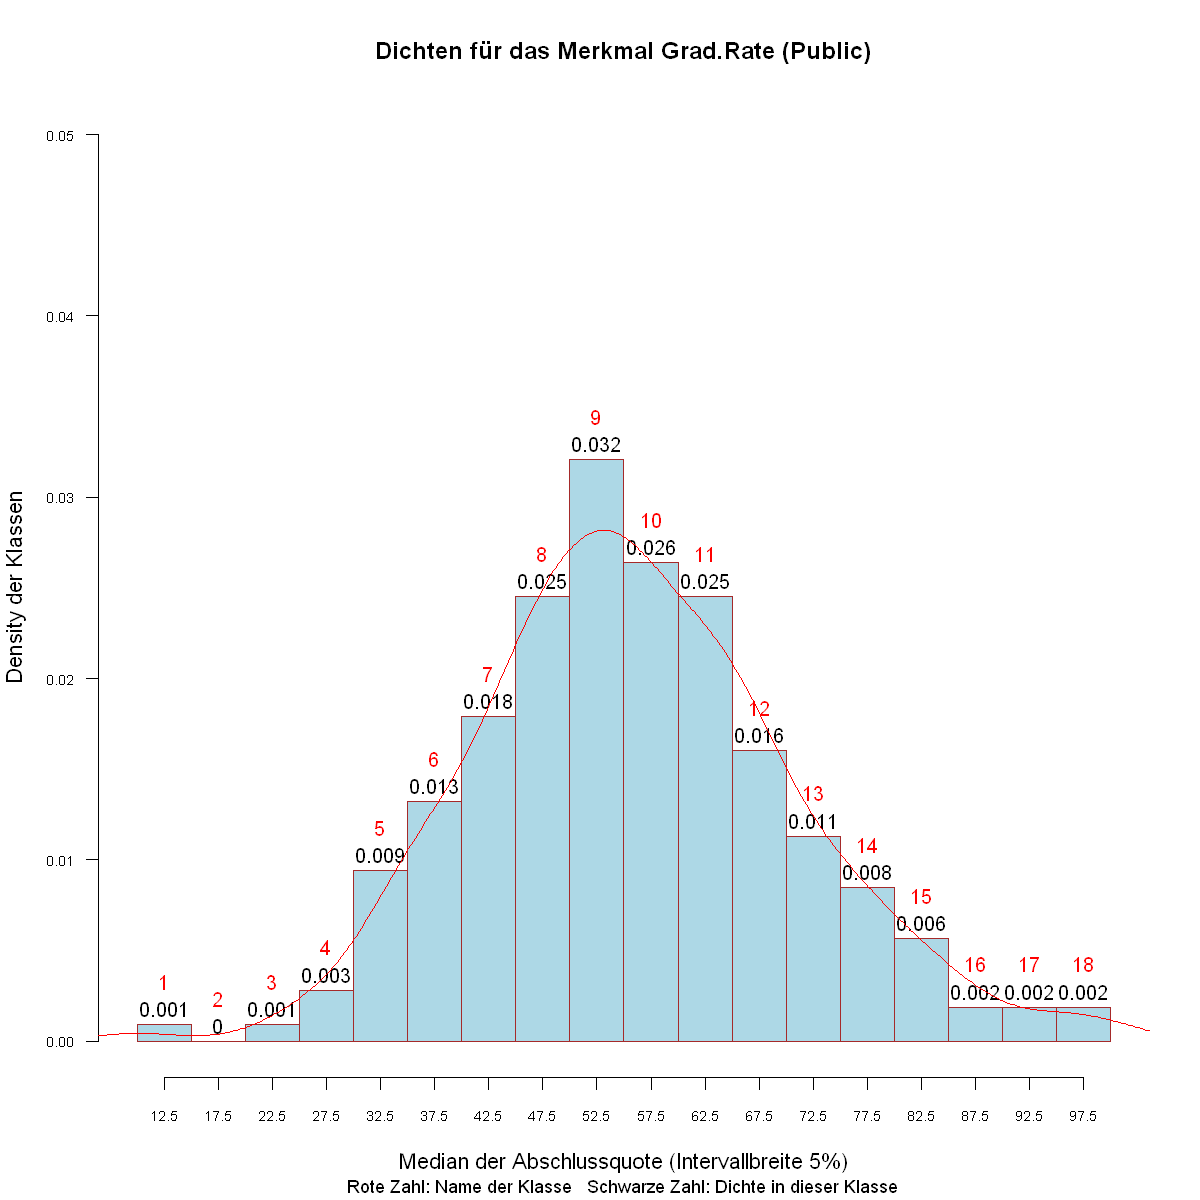

In [54]:
# Fall B: Dichten für das Merkmal Grad.Rate (Public)

#Klasseneinteilung:
limit<-length(df_public$Grad.Rate)
small<-min(df_public$Grad.Rate, na.rm = FALSE)
big<-max(df_public$Grad.Rate, na.rm = FALSE)
numerator<- (big - small)
denumerator<-(1+3.32*log(limit))
width<- ceiling(numerator/denumerator)  # errechnete Breite 5%
borders <- seq(small,big,by=width)  # angepasste Breite 5%

# Das Histogramm:
par(mfrow=c(1,1),cex.axis=0.7, cex.lab=1.1, cex.main=1.2, cex.sub=0.9)
h_main <- "Dichten für das Merkmal Grad.Rate (Public)"
h_sub <-  "Rote Zahl: Name der Klasse   Schwarze Zahl: Dichte in dieser Klasse"
h_xlab <- "Median der Abschlussquote (Intervallbreite 5%)"
h_ylab <- "Density der Klassen"
h_max <- 0.05
h_color <-"lightblue"
h_border <-"brown"

h<-hist(df_public$Grad.Rate,
        breaks=borders,
        col = h_color,
        border = h_border,
        las=2,
        xlim=c(small,big),
        ylim=c(0,h_max),
        main=h_main,
        xlab=h_xlab,
        ylab=h_ylab,
        labels = TRUE,
        freq=FALSE,
        include.lowest=TRUE,
        axes=TRUE,
        plot=TRUE,
        xaxt='n')

text(h$mids,h$density, adj = c(.5,-2.2),col = "red")
title(sub=h_sub)
axis(side=1, at=h$mids, labels=h$mids)
lines(density(df_public$Grad.Rate), col = "red")

Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
"einige notches liegen außerhalb der hinges ('box'): evtl. notch=FALSE setzen"


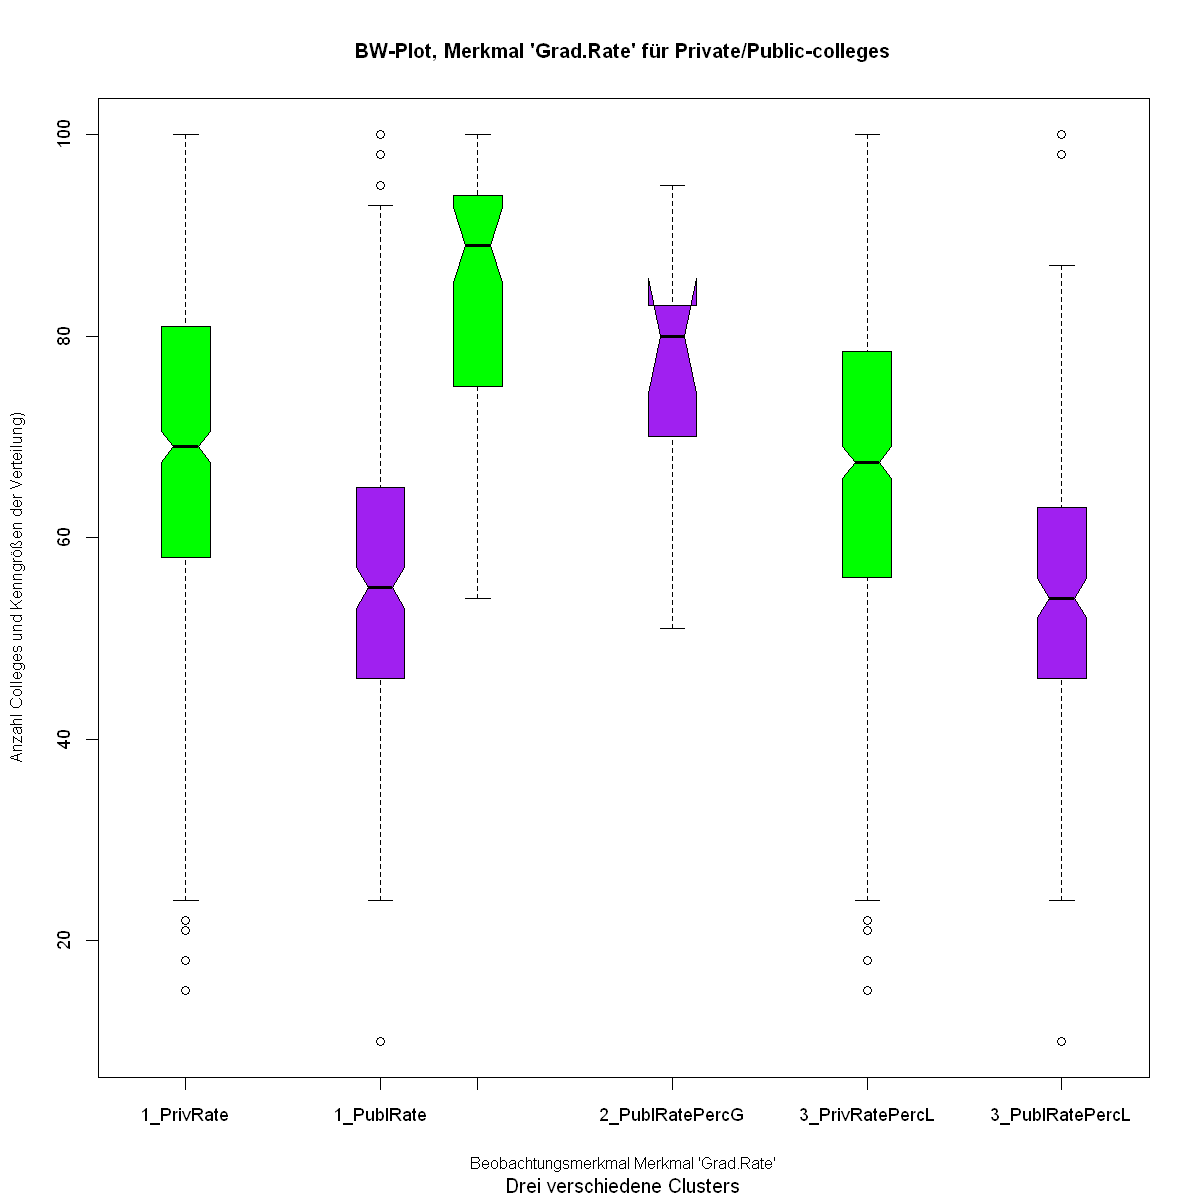

In [55]:
# Box-Whisker-Plot für das Merkmal Grad.Rate einmal für
# die "Stichprobe Private" und einmal für die "Stichprobe Public"
# und dann auch die Grad.Rate der besten 10%:


y1 <- df_private$Grad.Rate
y2 <- df_public$Grad.Rate

w1 <- subset(df_private,Top10perc > 50)$Grad.Rate
w2 <- subset(df_public,Top10perc > 50)$Grad.Rate 

z1 <- subset(df_private,Top10perc <= 50)$Grad.Rate
z2 <- subset(df_public,Top10perc <= 50)$Grad.Rate 

werte <- c(y1,y2,w1,w2,z1,z2)


y11 <- df_private$NameCollege
y22 <- df_public$NameCollege

w11 <- subset(df_private,Top10perc > 50)$NameCollege
w22 <- subset(df_public,Top10perc > 50)$NameCollege 

z11 <- subset(df_private,Top10perc < 51)$NameCollege
z22 <- subset(df_public,Top10perc < 51)$NameCollege 

namen <- c(y11,y22,w11,w22,z11,z22)


y111 <-rep("1_PrivRate", length(y1))
y222 <-rep("1_PublRate", length(y2))
w111 <-rep("2_PrivRatePercG", length(w1))
w222 <-rep("2_PublRatePercG", length(w2))
z111 <-rep("3_PrivRatePercL", length(z1))
z222 <-rep("3_PublRatePercL", length(z2))

gruppen <- c(y111,y222,w111,w222,z111,z222)

boxwerte <- cbind(namen,werte,gruppen)

data <- data.frame(values=werte, group=gruppen)

bwp<-boxplot(werte ~ gruppen,
                 data,
                 main = "BW-Plot, Merkmal 'Grad.Rate' für Private/Public-colleges",
                 xlab = "Beobachtungsmerkmal Merkmal 'Grad.Rate'",
                 ylab = "Anzahl Colleges und Kenngrößen der Verteilung)",
                 horizontal = FALSE,
                 notch = TRUE,
                 col = c("green", "purple","green","purple","green","purple"),
                 at = c(1,3,4,6,8,10),
                 cex.lab=0.8,
                 cex.axis=0.9,
                 cex.main=1.0,
                 cex.sub=0.7,        
                 pars = list(boxwex =0.5, staplewex=0.5, outwex=0.5),
                 plot=T)

title(sub="Drei verschiedene Clusters")
               

t1  <- bwp$stats;
colnames(t1) <- c("1_PrivRate","1_PublRate",
                  "2_PrivRatePercG","2_PublRatePercG",
                  "3_PrivRatePercL","3_PublRatePercL")
                  
rownames(t1) <- c("whisker low","1. quartil","median value",
                  "3. quartil","whisker high")




t2 <- bwp$conf;
colnames(t1) <- c("1_PrivRate","1_PublRate",
                  "2_PrivRatePercG","2_PublRatePercG",
                  "3_PrivRatePercL","3_PublRatePercL")

rownames(t2) <- c("95%-KI lower","95%-KI upper")

tab <- rbind(t1, t2)
view(as.data.frame(tab))


In [56]:
# Kenngrößen der Verteilungen zum Box-Whisker-Plot:

t1  <- bwp$stats;
colnames(t1) <- c("1_PrivRate","1_PublRate",
                  "2_PrivRatePercG","2_PublRatePercG",
                  "3_PrivRatePercL","3_PublRatePercL")
                  
rownames(t1) <- c("whisker low","1. quartil","median value",
                  "3. quartil","whisker high")




t2 <- bwp$conf;
colnames(t1) <- c("1_PrivRate","1_PublRate",
                  "2_PrivRatePercG","2_PublRatePercG",
                  "3_PrivRatePercL","3_PublRatePercL")

rownames(t2) <- c("95%-KI lower","95%-KI upper")

tab <- rbind(t1, t2)
as.data.frame(tab)

,1_PrivRate,1_PublRate,2_PrivRatePercG,2_PublRatePercG,3_PrivRatePercL,3_PublRatePercL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
whisker low,24.00000,24.00000,54.00000,51.00000,24.00000,24.00000
1. quartil,58.00000,46.00000,75.00000,70.00000,56.00000,46.00000
median value,69.00000,55.00000,89.00000,80.00000,67.50000,54.00000
3. quartil,81.00000,65.00000,94.00000,83.00000,78.50000,63.00000
whisker high,100.00000,93.00000,100.00000,95.00000,100.00000,87.00000
95%-KI lower,67.47116,52.93822,85.27648,74.30323,65.91016,52.09595
95%-KI upper,70.52884,57.06178,92.72352,85.69677,69.08984,55.90405


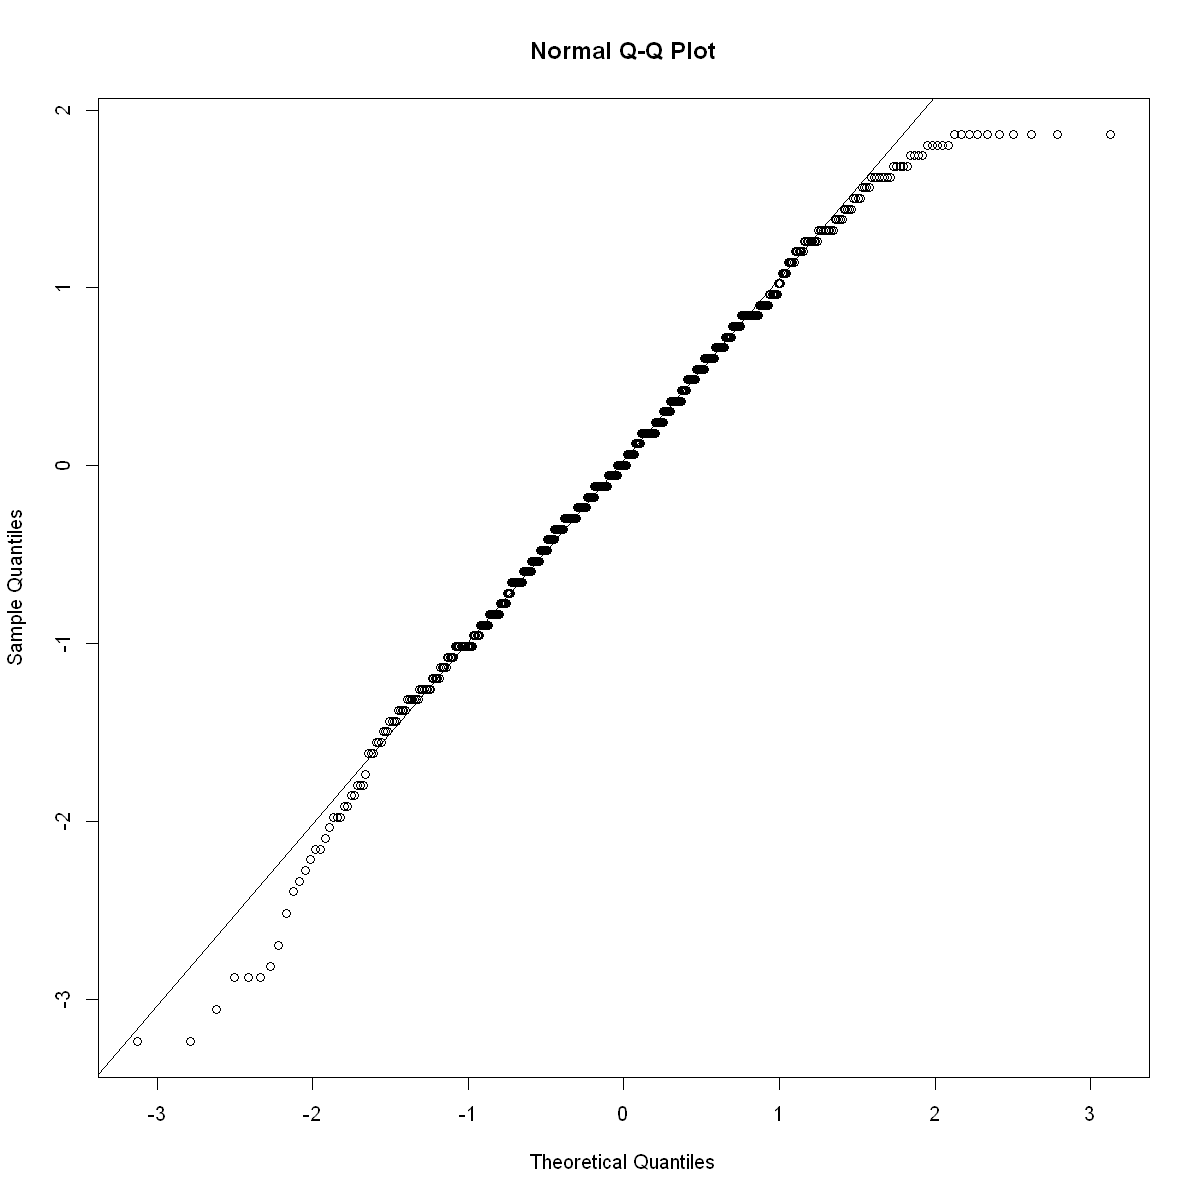

In [57]:
#Das Quantil-Quantil-Diagramm dient zur Prüfung von Variablen
# auf Normalverteilung.
# Es vergleicht die tatsächliche Verteilung einer Variable
# mit der idealtypischen Normalverteilung – mithilfe der Quantile.
# Letzteres ist eher unwichtig, da eigentlich nur ein Streudiagramm mit
# einer Gerade erzeugt und interpretiert werden muss.
# Für das Q-Q-Diagramm empfiehlt sich eine z-Standardisierung
# der betreffenden Variable. 

# Fall: Private
y1_private <- scale(df_private$Grad.Rate)
qqnorm(y1_private)
qqline(y1_private)

# Hier ist es wichtig, dass die Beobachtungen (=Punkte) möglichst
# auf oder nahe der idealen Normalverteilung (= Gerade) liegen.
# Je weiter weg Punkte sind, desto eher bezeichnet man sie als "Ausreißer"
# bzw. sind sie von einer idealen Normalverteilung weg.
# Eine genaue Vorgehensweise, was normalverteilt ist und was nicht,
# gibt es allerdings nicht.
# Wenn die Mehrheit der Punkte auf oder nahe der Gerade liegen,
# ist dies meist ausreichend, um von einer hinreichenden
# Normalverteilung auszugehen.
# Exakt einer Normalverteilung wird sowieso fast nie eine Verteilung entsprechen,
# weswegen der Anwender hier auch mitunter etwas pragmatischer sein kann.

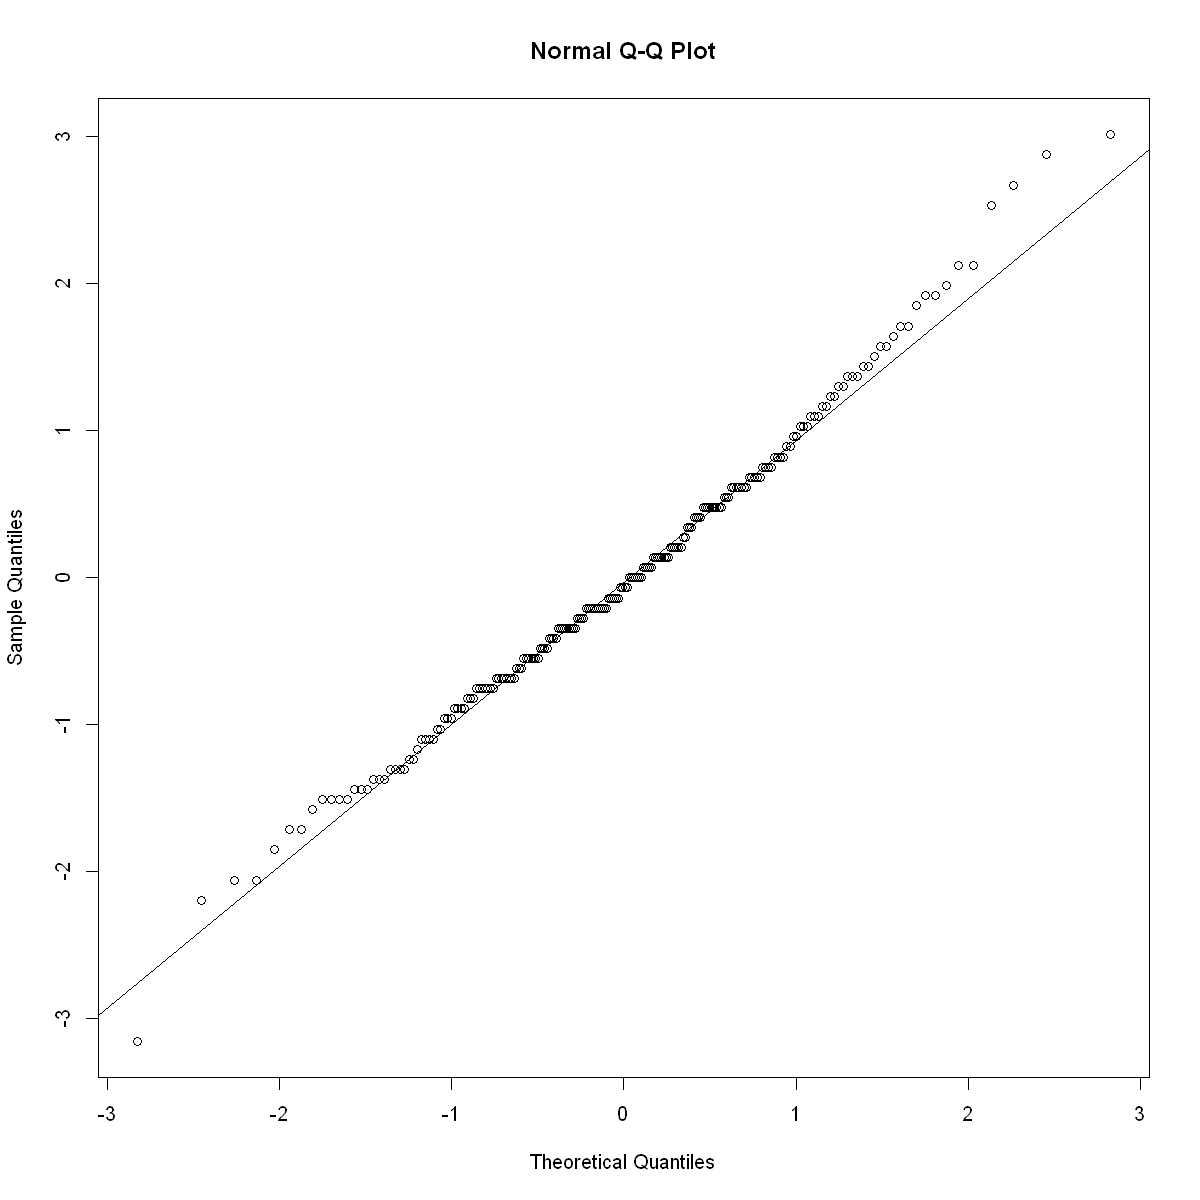

In [58]:
# Fall: Public
y2_public  <- scale(df_public$Grad.Rate)
qqnorm(y2_public)
qqline(y2_public)

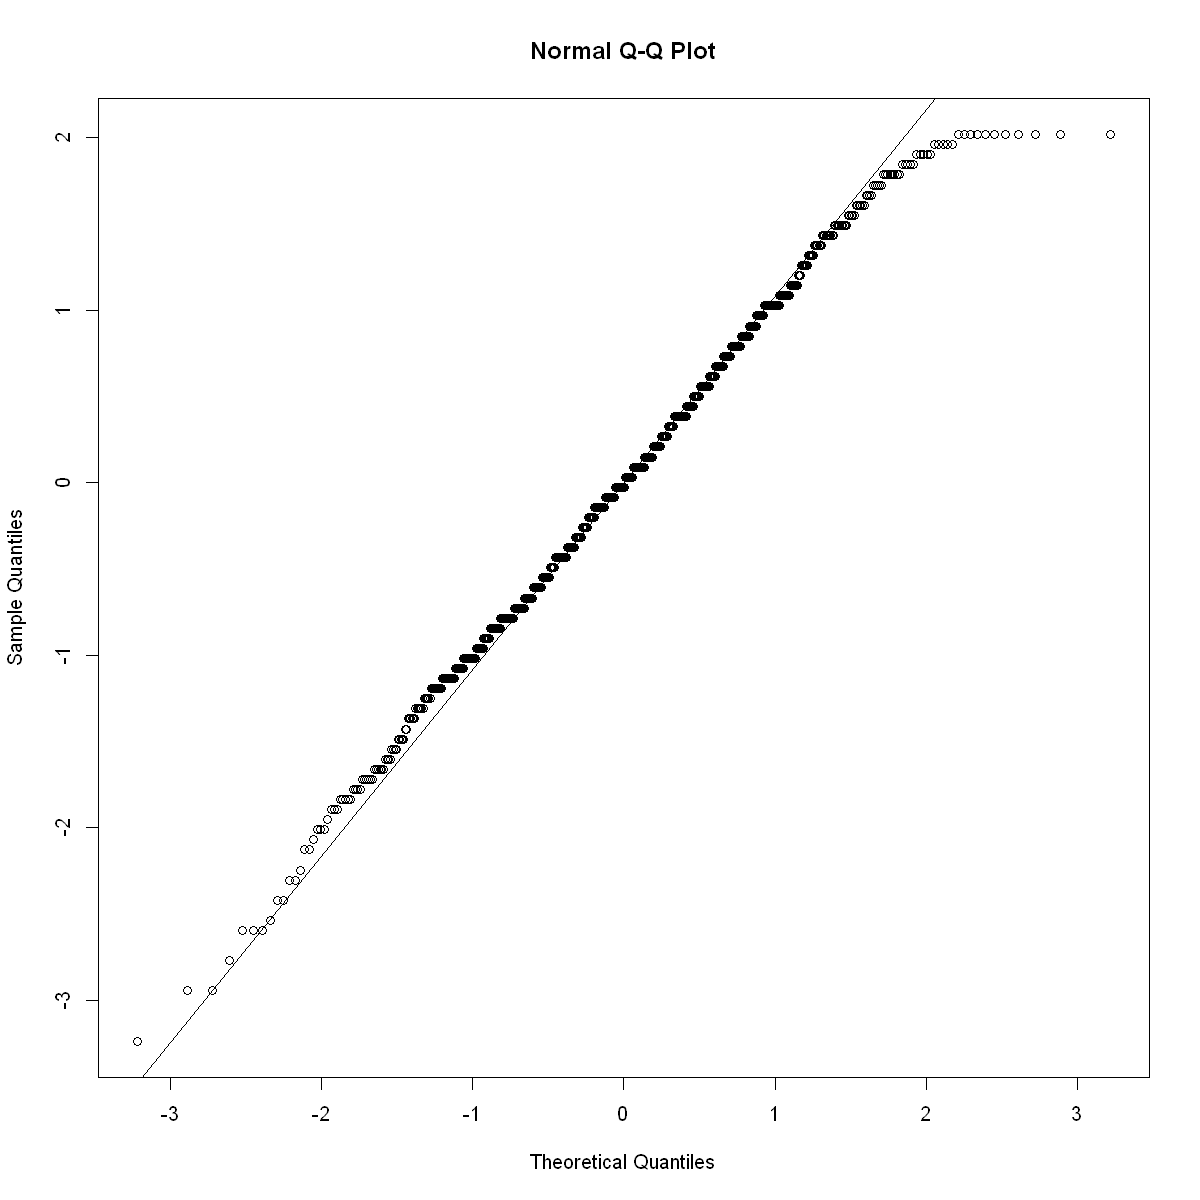

In [59]:
# Fall: Die ganze Datei
y3_all  <- scale(college_data$Grad.Rate)
qqnorm(y3_all)
qqline(y3_all)

## Modellbildung und statistische Tests (15 P)

In diesem Abschnitt untersuchen Sie verschiedene Hypothesen und gelangen zu Modellen über Zusammenhänge, die Sie Ihrem Auftraggeber mit auf den Weg geben können, um für die Zukunft Vorhersagen zu machen. Dabei spielt die Spalte `Grad.Rate` eine herausragende Rolle, weil Sie letztlich den Studienerfolg repräsentiert. Zur Präsentation gehört auch immer eine Argumentation, mit der Sie Ihr Vorgehen erläutern.

#### Aufgabe  
Forschungsfrage: Liegt ein Unterschied zwischen öffentlichen und privaten Colleges vor in Bezug auf die mittlere Abschlussrate? Formulieren Sie die zugehörigen Hypothesen $H_0$ und $H_1$.

Unser persönliches Vorgehen bei einem statistischen Test (hier insbesondere Parametertest):

(1) Hypothesenbildung: (Beachte: Den Sachverhalt, den man erwartet, steckt man in die Alternativhypothese. Denn nur die Nullhypothese kann verworfen werden.)

Unsere Hypotesen: Für den unbekannten Parameter mu verwenden wir eine einfache Nullhypothese und eine zusammengesetzte Alternativhypothese.

Nullhypothese 𝐻0: die mittlere Abschlussrate zwischen öffentlichen und privaten Colleges ist gleich. 𝑚𝑢1 = 𝑚𝑢2 Alternativhypothese 𝐻1: die mittlere Abschlussrate zwischen öffentlichen und privaten Colleges ist nicht gleich.mu1<>mu2

Es handelt sich hier um einen "zweiseitigen Test" zu diesen Hypothesen.

(2) Fallzahl: Die Festlegung der Fallzahl n (Größe des samples) beeinflußt die Varianz der Prüfgröße/Teststatistik und damit auch die Güte des Tests (power). Je größer n gewählt wird, desto kleiner wird die Varianz der Prüfgröße ausfallen und desto "trennschärfer wird der Test sein.

(3) Signifikanzniveau: Das Signifikanzniveau (Fehler 1. Art, hier alpha=0,05 gewählt) begrenzt den Fehler, daß die Nullhypothese H0 zu Unrecht verworfen wird.

(4) Prüfgröße: Bei Wahl einer geeigneten Prüfgröße/Teststatistik ist zu beachten, daß diese von den zu prüfenden Hypothesen abhängt. Es ist daher wichtig, daß die Verteilung dieser Prüfgröße/Teststatistik unter der Nullhypothese H0 bekannt sein muss. Somit kann dann das Signifikanzniveau (alpha=0,05 gewählt) bei der Testentscheidung eingehalten werden.

(5) p-Wert und die Ablehnung der Nullhypothese und damit zur Testentscheidung:

p-Wert: t = Betrag des Wertes der Prüfgröße unter Verwendung der Werte der Stichproben T = Allgemeine Stichprobenfunktiuon/Prüfgröße/Teststatistik

Um zu einer Testentscheidung zu gelangen betrachten wir die Signifikanz-Wahrscheinlichkeit P(|T|>=t | H0 gilt) (zweiseitiger Test), daß bei Gültigkeit von H0 der Betrag der Testgröße T den beobachteten Wert t oder einen größeren Wert annimmt. Je größer also diese Signifikanz-Wahrscheinlichkeit ist, um so besser passen die Daten zur Nullhypothese H0. Kleine Signifikanz-Wahrscheinlichkeiten gehören zu Meßreihen, deren Entstehen unter H0 unwahrscheinlich ist.

Bei vorgegebenen Signifikanzniveau alpha gilt P(|T|>=t | H0 gilt) < alpha genau dann, wenn |T|>=t ist und damit die Stichprobe im kritischen Bereich zum Signifikanzniveau alpha liegt:

Ablehnung der Nullhypothese: Die Nullhypothese ist genau dann abzulehnen, wenn P(|T|>=t | H0 gilt) < alpha eine wahre Aussage ist. Wir sagen dann, daß die Beobachtung auf dem Niveau alpha signikant ist und dann eben nicht signifikant, wenn P(|T|>=t | H0 gilt) >= alpha gilt.

(6) Kritischer WerteBereich/Ablehnungsbereich (zumeist Intervalle): P(|T|>=t | H0 gilt) < alpha => |T| > Quantil(alpha) unter der Beachtung, daß H0 gilt und damit auch die zugrundeliegende Verteilungsfunktion. 

Im speziellen:

(1) Laut Gespräch mit unserem Kunden am 3.8.2022 wurde uns mitgeteilt, daß man das Merkmal "Grad.Rate" als metrische und damit stetige Zufallsvariable ansehen könne.

(2) Nach Ansicht der Absoluten Häufigkeiten,der Dichten des Merkmals "Grad.Rate", der Box-Plots und der QQ-Plots treffen wir folgende Annahmen:

(i) Es handelt sich um ein Testverfahren für zwei unverbundene/unabhängige stetige Stichproben.
    Die Stichproben von public und privat sind disjunkte Mengen.
    (siehe dazu auch Box-Plots)
(ii) Es handelt sich um einen parametrischen Test, insbesondere Normalverteilung.
    (siehe Dichten und QQ-Plots).
    Dies wird hier anschließend noch exakter behandelt.
    Wir werden prüfen, ob die Population normalverteilt ist oder nicht.
    Wir werden den Shapiro-Test verwenden.
    Damit der Test jedoch zuverlässig ist, werden wir weitere Stichproben aus der Grundgesamtheit/Stichproben
    ziehen und dann den Mittelwert der p-Werte für die Normalisierungsprüfung ermitteln.
    (=> Neue Erfindung und Weiterentwicklung des Shapiro-Tests: "Der Shapiro-SBuSM-Test).  

(3) Somit werden wir einen Student t-Test für unabhängige Stichproben verwenden.

(4) Die Varianzen sind uns nicht bekannt. Deswegen verwenden wir dafür Schätzer.

(5) Die unbekannten Varianzen sind möglicherweise ungleich. (siehe Box-Plott und die Kenngrößen der Verteilungen zum Box-Whisker-Plot)

(6) Auch die Stichprobenumfänge bei private und public sind ungleich.

==> Wir haben uns für den "Welch Two Sample t-Test" entschieden.

Im weiteren nun die einzelnen Schritte:

In [60]:
pvalues <- numeric(50)
for(i in 1:50){
    beispiel <- sample(college_data$Grad.Rate , size = 50)
    ergebnis <- shapiro.test(beispiel)
    pvalue <- ergebnis$p.value 
    pvalues[i] <- pvalue
}

pvalues

# Ortalama P Değerleri
mean(pvalues)

[1] 0.79073972 0.15066916 0.50301677 0.88295964 0.53205224 0.40299973
 [7] 0.68157256 0.89156530 0.05637668 0.94400533 0.40858688 0.08486290
[13] 0.04347671 0.01180141 0.73283060 0.13770701 0.05691403 0.17948315
[19] 0.19845228 0.06308260 0.36549026 0.65232872 0.25111600 0.78528209
[25] 0.22044783 0.10750944 0.30663954 0.61795361 0.09329668 0.43163823
[31] 0.15855905 0.20766327 0.17787580 0.43653870 0.52945189 0.62518202
[37] 0.64714064 0.42983490 0.39273273 0.30823567 0.78330478 0.28170415
[43] 0.30835654 0.83061364 0.31867641 0.19737119 0.17605131 0.22699905
[49] 0.04688711 0.69379059

[1] 0.3872365

In [61]:
pvalues <- numeric(50)
for(i in 1:50){
    beispiel <- sample(df_public$Grad.Rate , size = 50)
    ergebnis <- shapiro.test(beispiel)
    pvalue <- ergebnis$p.value 
    pvalues[i] <- pvalue
}

pvalues

# Ortalama P Değerleri
mean(pvalues)

[1] 0.25415318 0.34259865 0.02816843 0.52537198 0.88760374 0.59133695
 [7] 0.25294222 0.18073090 0.20940809 0.59781970 0.65869552 0.43336055
[13] 0.07892818 0.41637677 0.39401772 0.36702887 0.58458707 0.57265919
[19] 0.33273945 0.39156616 0.86519281 0.18327205 0.27548220 0.11045026
[25] 0.30098059 0.41951435 0.70740801 0.09131240 0.02586588 0.60987845
[31] 0.69451356 0.22132496 0.04724204 0.78208069 0.12966908 0.41605973
[37] 0.48641233 0.67797589 0.41326266 0.97420569 0.30946169 0.79018424
[43] 0.86397719 0.23389354 0.35694294 0.03821463 0.90292920 0.67116922
[49] 0.98839092 0.87119572

[1] 0.4511711

In [62]:
pvalues <- numeric(50)
for(i in 1:50){
    beispiel <- sample(df_private$Grad.Rate , size = 50)
    ergebnis <- shapiro.test(beispiel)
    pvalue <- ergebnis$p.value 
    pvalues[i] <- pvalue
}

pvalues

# Ortalama P Değerleri
mean(pvalues)

[1] 0.23421348 0.73060973 0.36732956 0.07619013 0.61437009 0.78668411
 [7] 0.45472310 0.62976921 0.75293676 0.13201366 0.18718346 0.28385732
[13] 0.08521250 0.53988305 0.38508943 0.04627363 0.21386767 0.04171830
[19] 0.01483887 0.39750953 0.16250532 0.08537486 0.19783274 0.50582375
[25] 0.38347284 0.23850962 0.25068586 0.21866026 0.54345457 0.33484911
[31] 0.17839788 0.85969408 0.38607784 0.05941139 0.34803478 0.06613652
[37] 0.01825026 0.25586209 0.80703886 0.16769237 0.26577536 0.75159176
[43] 0.19009044 0.46221543 0.03246926 0.89540141 0.57002987 0.14358044
[49] 0.52129194 0.34965701

[1] 0.3444828

Es scheint, dass unsere Population und Stichproben normalverteilt sind.
0.418 / 0.380 / 0.298 > Signifikantzniveau (alfa = 0,05)

#### Aufgabe  
Um welche Hypotheseart handelt es sich?

Wir haben Unterschiedshypothesen mit mu und T-Test ausgewählt. Insbesondere siehe die Ausführungen anfangs.

#### Aufgabe  
Beschreiben Sie die Testsituation und erläutern Sie, für welchen Test Sie sich entscheiden und warum. Führen Sie gegebenenfalls unterstützende Tests, Visualisierungen und Berechnungen durch, um Ihre Wahl zu rechtfertigen.

Wir haben zwei unabhangige stichproben (private, public). Population oder Stichprobenpopulation sind Normalverteilt. Deswegen machen wir den T-Test (metrisches Merkmal Grad.Rate). Wir verwenden das Signifikantniveau alfa = 0.05.

Unsere Hypotesen:
𝐻0: die mittlere Abschlussrate zwischen öffentlichen und privaten Colleges ist gleich. 𝑚𝑢1 = 𝑚𝑢2
𝐻1: die mittlere Abschlussrate zwischen öffentlichen und privaten Colleges ist nicht gleich.

Insbesondere siehe die Ausführungen anfangs.

#### Aufgabe  
Führen Sie den Test durch. Sie können sich hierfür einer R-Funktion bedienen.

Vorgehensweise:
 (0) Aufgabe der Hypothese soll es sein, die unbekannten Erwartungswerte
     E_private_Grad_Rate und E_public_Grad_Rate auf Gleichheit zu untersuchen. 
  
 (1) Testverfahren für zwei unverbundene/unabhängige stetige (=metrische)
     Stichproben mit dem Merkmal"Grad.Rate".

 (2) Es wurde visuell anhand der Grafik mit der Dichte
     und rechnerisch mit dem Shapiro-Wil-Test
     für das Merkmal "Grad.Rate" überprüft,
     daß es sich um zwei normalverteilte Stichproben
     (Stichprobe mit dem Namen "Public" und Stichprobe mit dem Namen "Private")
     für das Merkmal "Grad.Rate" handelt.

 (3) Da es sich um zwei voneinander disjunkte Stichproben handelt,
     machen wir o.B.d.A. und o.B.a.d.A. die Annahme, daß deren Varianzen
     nicht nur unbekannt, sondern auch ungleich sind
     => Var_Private <> Var_Public     
     
Insbesondere siehe die Ausführungen anfangs.    

In [63]:
sample_private <- df_private$Grad.Rate
sample_public  <- df_public$Grad.Rate

t.test(sample_public, sample_private, alternative="two.sided", var.equal=FALSE, conf.level = 0.95)


	Welch Two Sample t-test

data:  sample_public and sample_private
t = -10.569, df = 430.03, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.32730 -10.52054
sample estimates:
mean of x mean of y 
 56.04245  68.96637 


#### Aufgabe
Interpretieren Sie die Ergebnisse mit Blick auf Ihre Hypothesen.

 P(|T|>=t | H0 gilt) = p-value < 2.2e-16 < 0,05 = alpha  (siehe Erläuterungen dazu anfangs)

Ablehnung der Nullhypothese:
Die Nullhypothese ist abzulehnen, da P(|T|>=t | H0 gilt) < alpha eine wahre Aussage ist.
Die Beobachtung ist auf dem Niveau alpha signikant.
Das heißt, daß nicht auszuschließen ist,
daß die mittlere Abschlussrate zwischen öffentlichen und privaten Colleges ungleich ist.

In [64]:
# Die Effektstärke (Cohens d) für ungleiche Stichproben für Welsch:

install.packages("lsr")
library(lsr)

n <- length(sample_private)
m <- length(sample_public)

d <- matrix(rep(NA, n*m), nrow=n)

for (i in 1:n) {
  for (j in 1:m) {
    if (sample_private[i]  < sample_public[j]) d[i, j] <- 1
    if (sample_private[i] == sample_public[j]) d[i, j] <- 0.5
    if (sample_private[i]  > sample_public[j]) d[i, j] <- 0
  }}

P.hat <- sum(apply(d, 1, sum))/(m*n);
P.hat           

s     <- sqrt(((n-1)*var(sample_public) + (m-1)*var(sample_private))/(n+m-2))
d.hat <- (mean(sample_public)-mean(sample_private))/ s;
d.hat  

# -0.8521442 < 0.2 => kein Effekt.


Warning message:
"Paket 'lsr' wird gerade benutzt und deshab nicht installiert"


[1] 0.2698364

[1] -0.8513304

In [65]:
# Der Stichprobenumfang:
# Für alpha=0,05  und einer gewünschten Power 1-beta=0,8  
# sollte mindestens n=175 betragen.

In [66]:
# Power des Testes.kommt hier hin.

#### Aufgabe
Untersuchen Sie folgendes fiktives Szenario:  
Präsident Obama und seine Administration führten 2009 die "No Child is left Behind" Gesetzgebung ein. Dabei sollte durch entsprechende Ausgaben und organisatorische Veränderungen in den Schulen dafür gesorgt werden, dass alle (!) Kinder bis 2014 ausreichende Fähigkeiten im Lesen und in Mathematik mitbringen. Der vorliegende Datensatz wurde nach 2014 erhoben. In 2009 lag die mittlere Abschlussrate an den Colleges bei 58%. Führen sie einen Test durch, um zu überprüfen, ob sich die Situation seitdem signifikant ($\alpha$ = 0.05) verbessert hat.

Unsere Hypotesen:<br>
$H_0$: die mittlere Abschlussrate ist kleiner oder gleich als in 2009. $mu_1$ <= $mu_2$<br>
$H_1$: die mittlere Abschlussrate ist größer als in 2009. 

Im speziellen:

(1) Laut Gespräch mit unserem Kunden am 3.8.2022 wurde uns mitgeteilt,
    daß man das Merkmal "Grad.Rate" als metrische und damit stetige Zufallsvariable ansehen könne.

(2) Nach Ansicht der Absoluten Häufigkeiten,der Dichten des Merkmals "Grad.Rate",
    der Box-Plots und der QQ-Plots treffen wir folgende Annahmen:

(i) Es handelt sich um ein Testverfahren für eine stetige skalierte Stichprobe.
   
(ii) Es handelt sich um einen parametrischen Test, insbesondere Normalverteilung.
    (siehe Dichten und QQ-Plots).
    Wir haben bereits geprüft, daß die Population normalverteilt ist.
    
(3) Somit werden wir einen Student t-Test verwenden, da der Erwartungswert mit mu=58 bekannt ist.

(4) Die Varianz ist uns nicht bekannt. Deswegen verwenden wir dafür einen Schätzer.

==> Wir haben uns für den "Einstichproben t-Test" entschieden.

In [67]:
sample_colleges <-college_data$Grad.Rate 
t.test(sample_colleges, alternative="greater", mu=58)


	One Sample t-test

data:  sample_colleges
t = 12.115, df = 776, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 58
95 percent confidence interval:
 64.42879      Inf
sample estimates:
mean of x 
 65.44015 


Da p-value < 2.2e-16 < 0.05 gilt, kann die
Nullhypothese kann bei einseitiger Hypothesenstellung mit einer Irrtumswahrscheinlichkeit von alpha=0,05 abgelehnt werden.

#### Aufgabe
Entscheiden Sie sich bei den numerischen Merkmalen, für die Sie im Explorationsteil gefunden haben, dass sie relevant für den Studienerfolg zu sein scheinen, für das aus Ihrer Sicht wichtigste. Erstellen Sie auf Basis dieses Merkmals (Regressor) ein lineares Modell, das Ihnen die Voraussage der Abschlussrate (Regressand) ermöglicht.

***Model 1: Abschlussrate vs. Studiengebühren für Studenten anderer Bundesstaaten***

**Wir haben vorher kontroliert, ob Abschlussrate (Grad.Rate) normalverteilt ist und festgelegt, dass das Merkmal Abschlussrate einer Normalverteilung entspricht. <br>
Outstate (Studiengebühren für Studenten anderer Bundesstaaten) muss auch kontrolliert werden.**

In [68]:
pvalues_outstate <- numeric(50)
for(i in 1:50){
      
      beispiel <- sample(college_data$Outstate , size = 50)
      ergebnis  <- shapiro.test(beispiel)
      pvalue <- ergebnis$p.value 
      pvalues_outstate[i] <- pvalue
}

# Durschnitliche P Value
mean(pvalues_outstate)

[1] 0.08233872

*Man kann sehen, dass Outstate-Merkmal normal verteilt wird.*

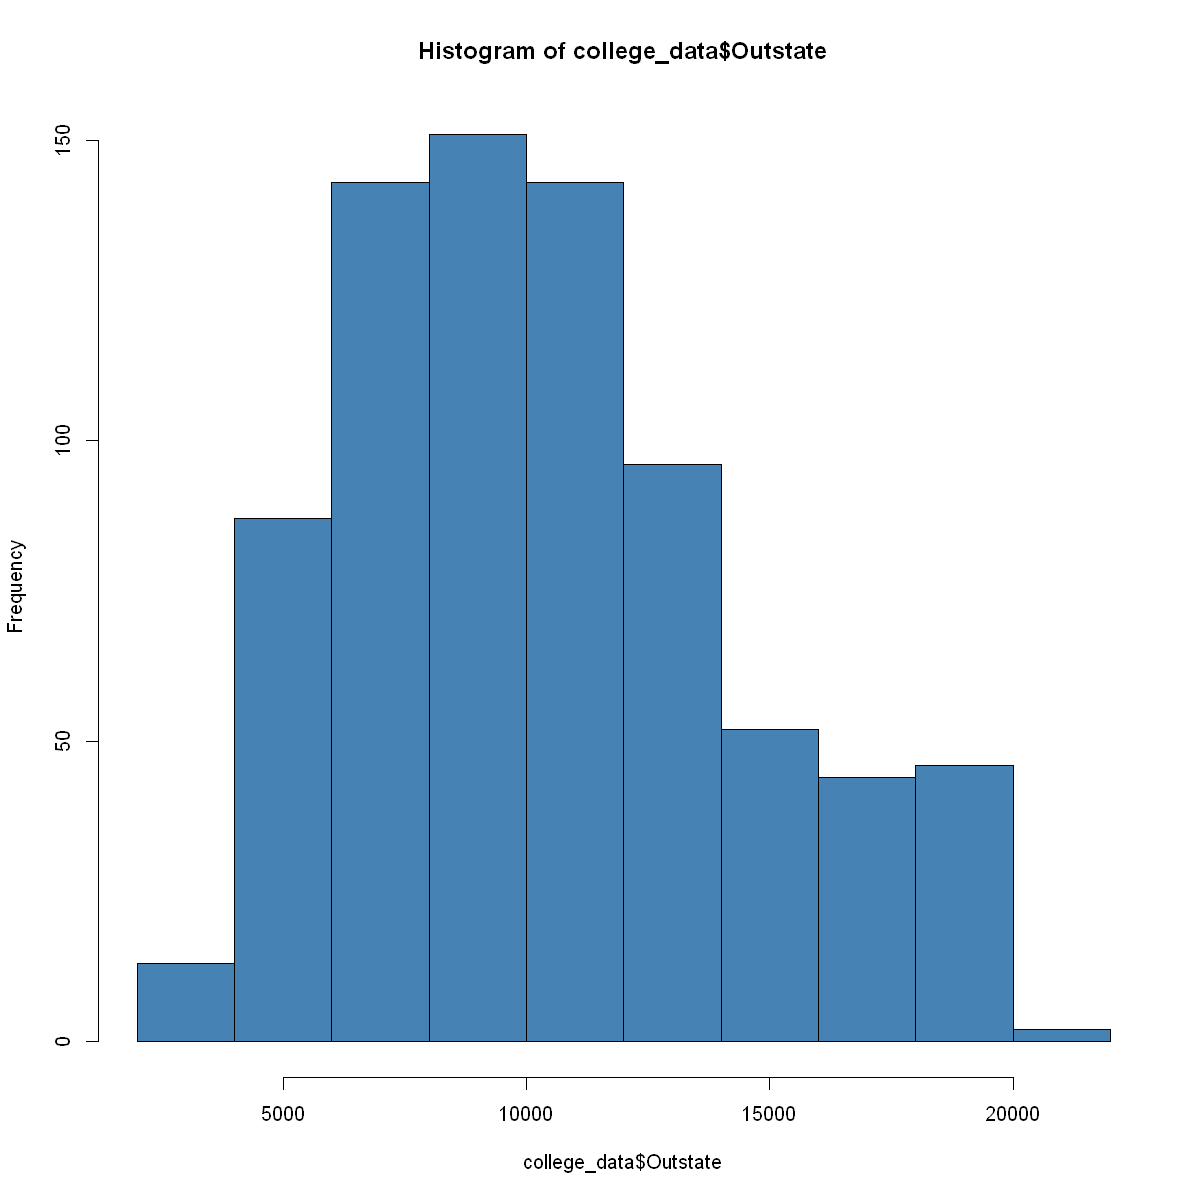

In [69]:
hist(college_data$Outstate, col = "steelblue")

**Korrelationrate zwichen Abschlussrate und Prozentzahl des Top10**

In [70]:
cor(college_data$Grad.Rate, college_data$Outstate)

[1] 0.5736117

In [71]:
cor.test(college_data$Grad.Rate, college_data$Outstate, use = "complete.obs")


	Pearson's product-moment correlation

data:  college_data$Grad.Rate and college_data$Outstate
t = 19.495, df = 775, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5244363 0.6189730
sample estimates:
      cor 
0.5736117 


p-Wert ist sehr klein. Das heißt, dass zwei Merkmalen eine gute Korrelation haben.

In [72]:
(model <- lm(college_data$Grad.Rate ~ college_data$Outstate)) # y ~ x


Call:
lm(formula = college_data$Grad.Rate ~ college_data$Outstate)

Coefficients:
          (Intercept)  college_data$Outstate  
            39.956137               0.002441  


**y = 39.995114 + 0.002439 x**

In [73]:
summary(model)


Call:
lm(formula = college_data$Grad.Rate ~ college_data$Outstate)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.141  -9.084   0.027   8.605  50.671 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.996e+01  1.401e+00   28.52   <2e-16 ***
college_data$Outstate 2.441e-03  1.252e-04   19.50   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.03 on 775 degrees of freedom
Multiple R-squared:  0.329,	Adjusted R-squared:  0.3282 
F-statistic:   380 on 1 and 775 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



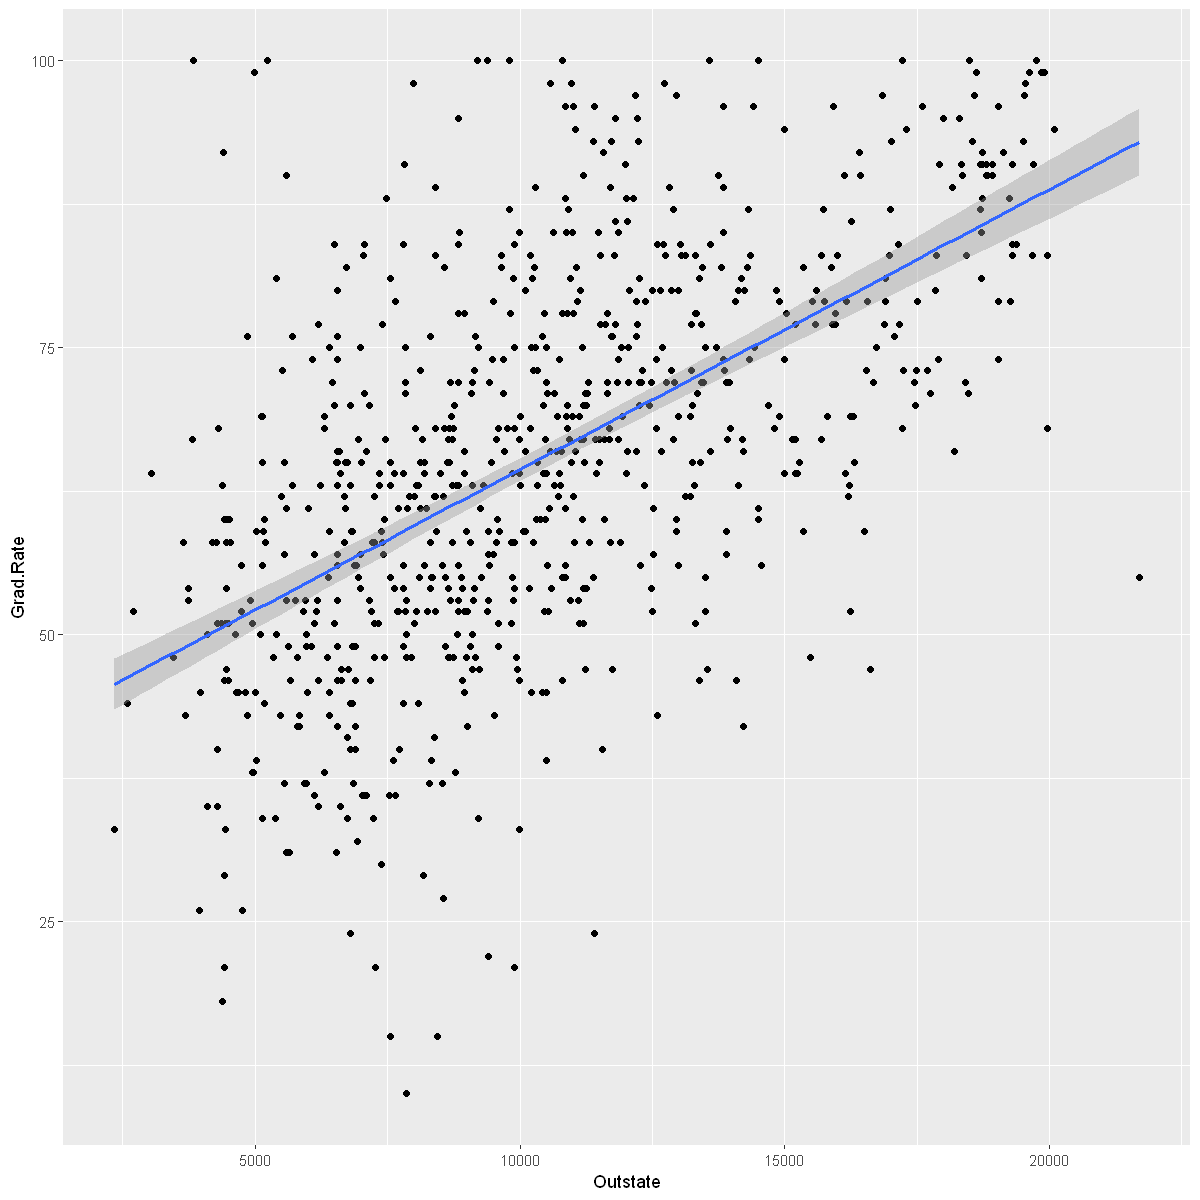

In [74]:
ggplot(college_data, aes(Outstate, Grad.Rate)) +
  geom_point() +
  stat_smooth(method = lm)

**Bestimmtheitsmaß**

In [75]:
(r2 <- cor(college_data$Outstate, college_data$Grad.Rate) ** 2)
#summary(model)$r.squared

[1] 0.3290303

In [76]:
summary(model)$adj.r.squared

[1] 0.3281646

In [77]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),39.956136708,1.4007955646,28.52389,6.484732e-123
college_data$Outstate,0.002440841,0.0001252051,19.49474,3.505657e-69


*Der p-Wert für die Prädiktorvariable ist 1.628927e-68. Da dieser Wert kleiner als 0,05 ist, steht er in einem statistisch signifikanten Zusammenhang mit der Antwortvariablen im Modell.*

**Anmerkung:** je teurer die Outstates desto höher die Abschlußquote (Grad-Rate)

***Model2: Abschlussrate vs. Prozentzahl des Top10***

In [78]:
pvalues_Top10perc <- numeric(50)
for(i in 1:50){
      
      beispiel <- sample(college_data$Top10perc , size = 50)
      ergebnis  <- shapiro.test(beispiel)
      pvalue <- ergebnis$p.value 
      pvalues_Top10perc[i] <- pvalue
}

# Durschnitliche P Value
mean(pvalues_Top10perc)

[1] 0.006436973

*Man kann sehen, dass Outstate-Merkmal normal verteilt wird.*

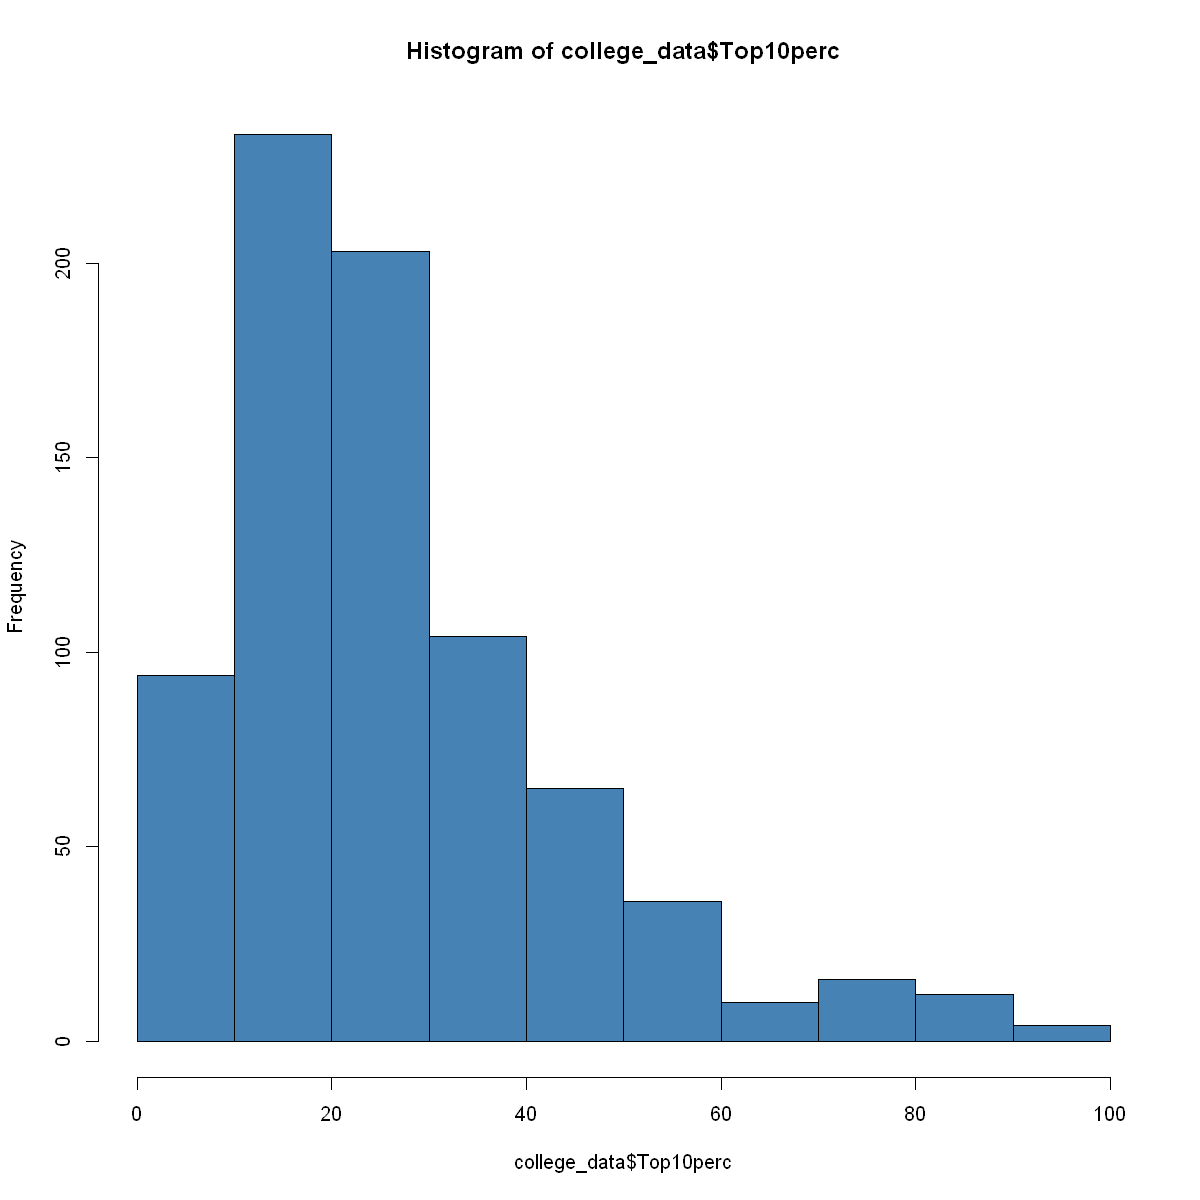

In [79]:
hist(college_data$Top10perc, col = "steelblue")

**Korrelationrate zwichen Abschlussrate und Prozentzahl des Top10**

In [80]:
cor(college_data$Grad.Rate, college_data$Top10perc)

[1] 0.498118

In [81]:
cor.test(college_data$Grad.Rate, college_data$Top10perc, use = "complete.obs")


	Pearson's product-moment correlation

data:  college_data$Grad.Rate and college_data$Top10perc
t = 15.992, df = 775, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4433161 0.5492100
sample estimates:
     cor 
0.498118 


p-Wert ist sehr klein. Das heißt, dass zwei Merkmalen eine gute Korrelation haben.

In [82]:
(model2 <- lm(college_data$Grad.Rate ~ college_data$Top10perc)) # y ~ x


Call:
lm(formula = college_data$Grad.Rate ~ college_data$Top10perc)

Coefficients:
           (Intercept)  college_data$Top10perc  
               52.1186                  0.4834  


**y = 52.180 + 0.482 x**

In [83]:
summary(model2)


Call:
lm(formula = college_data$Grad.Rate ~ college_data$Top10perc)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.369  -9.820   0.313   9.114  44.981 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            52.11861    0.98886   52.71   <2e-16 ***
college_data$Top10perc  0.48339    0.03023   15.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.85 on 775 degrees of freedom
Multiple R-squared:  0.2481,	Adjusted R-squared:  0.2472 
F-statistic: 255.8 on 1 and 775 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



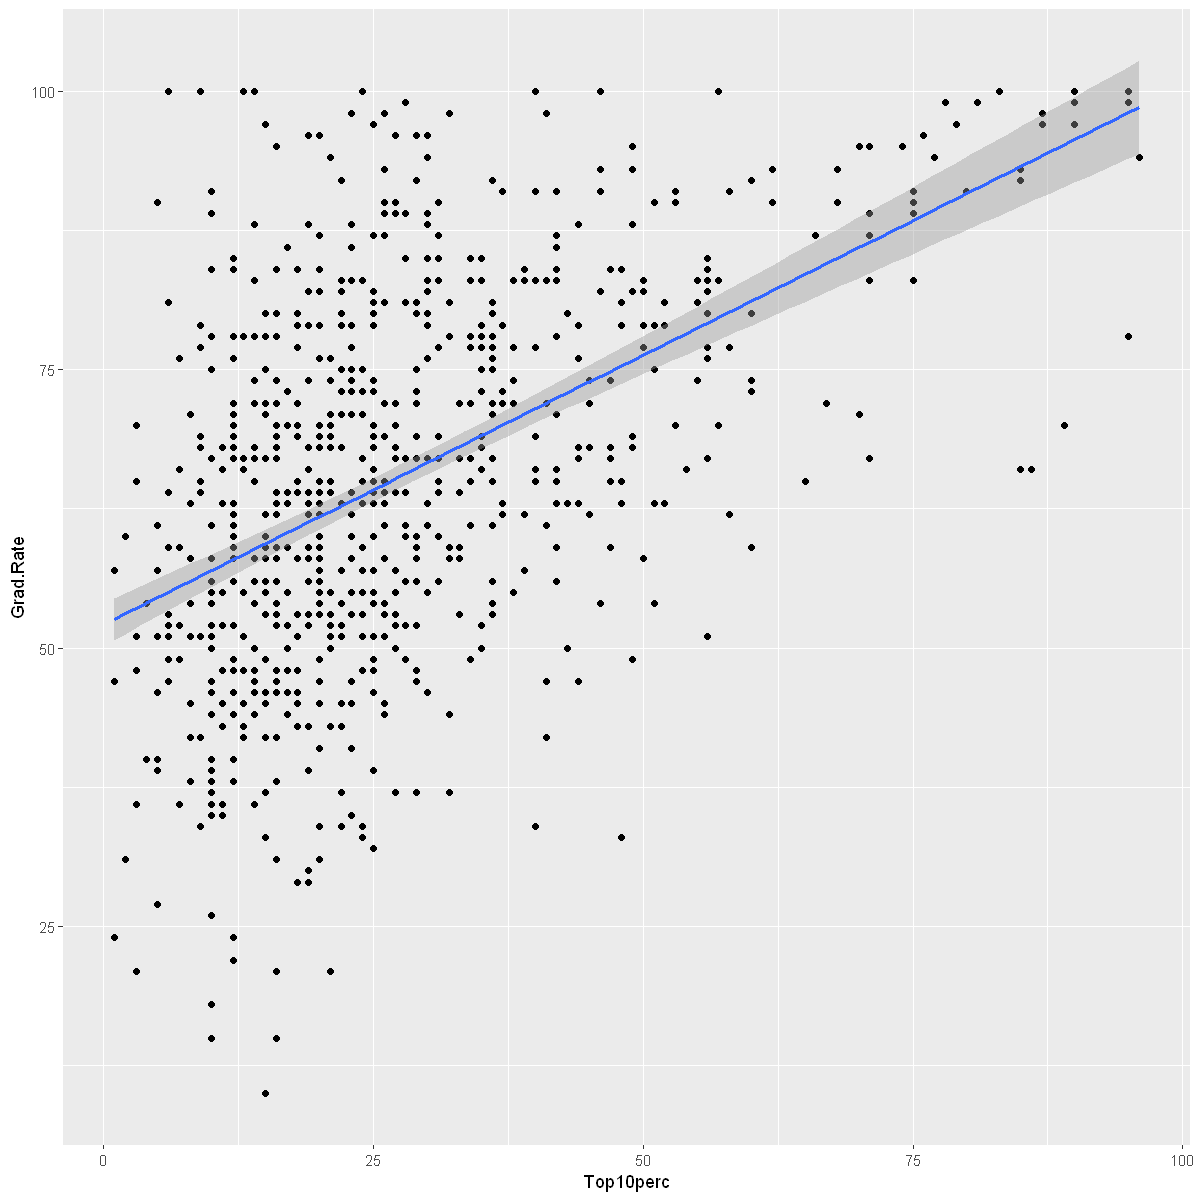

In [84]:
ggplot(college_data, aes(Top10perc, Grad.Rate)) +
  geom_point() +
  stat_smooth(method = lm)

**Bestimmtheitsmaß**

In [85]:
(r2 <- cor(college_data$Top10perc, college_data$Grad.Rate) ** 2)
#summary(model)$r.squared

[1] 0.2481216

In [86]:
summary(model2)$adj.r.squared

[1] 0.2471514

In [87]:
summary(model2)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),52.1186088,0.98885515,52.70601,1.831551e-258
college_data$Top10perc,0.4833905,0.03022657,15.99224,5.825646e-50


*Der p-Wert für die Prädiktorvariable ist 2.897974e-49. Da dieser Wert kleiner als 0,05 ist, steht er in einem statistisch signifikanten Zusammenhang mit der Antwortvariablen im Modell.*

**Anmerkung**: Die Studentin/nen in Top10perc haben ein positive Auswirkung auf den Abschlussrate

**Model 3: mit zwei Merkmalen**

In [88]:
model3 <- lm(Grad.Rate ~ Outstate + Top10perc, data = college_data)

In [89]:
summary(model3)


Call:
lm(formula = Grad.Rate ~ Outstate + Top10perc, data = college_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.598  -8.030  -0.206   7.321  50.243 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.950e+01  1.355e+00  29.151  < 2e-16 ***
Outstate    1.826e-03  1.463e-04  12.482  < 2e-16 ***
Top10perc   2.492e-01  3.337e-02   7.466 2.23e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.56 on 774 degrees of freedom
Multiple R-squared:  0.3741,	Adjusted R-squared:  0.3725 
F-statistic: 231.3 on 2 and 774 DF,  p-value: < 2.2e-16


In [90]:
#die Koeffizienten aus der Modellausgabe
intercept <- coef(summary(model3))["(Intercept)", "Estimate"]
outstate <- coef(summary(model3))["Outstate", "Estimate"]
top10 <-coef(summary(model3))["Top10perc", "Estimate"]
round(intercept,3)
round(outstate,3)
round(top10,3)

[1] 39.504

[1] 0.002

[1] 0.249

**The model coefficients to predict the value for Abschlus_Rate:**<br>

**Abschlus_Rate = 39.546 + Studiengebuehren*0.002 + Prozentanzahl_Besten_Schule*0.247**

Die Gesamt-F-Statistik des Modells ist 227.8 und der entsprechende p-Wert ist 2.2e-16. 
Dies weist darauf hin, dass das Gesamtmodell statistisch signifikant ist. 
Mit anderen Worten, das Regressionsmodell als Ganzes ist nützlich.

Durch das Modell lässt sich erkennen, dass sich die Studenten, die von den besten Schulen kommen eine positive Auswirkung auf die Abschlussquote haben. <br>
Die Studenten, die aus anderer Bundesstaaten kommen, haben auch eineAuswirkung, aber jedoch niedrig. 

#### Aufgabe
Geben Sie für Ihr Modell ein Gütemaß an. Würden Sie Ihrem Auftraggeber dieses Modell empfehlen?

Unter den 3 Modellen ist das erste Modell (Modell 1) am besten, aber die Güte der Anpassung wird über die Abweichungen (y-y_dach) (Residuen genannt) beurteilt.
Die Residuen sind rein visuel gesehen zu hoch. Wir können dieses Modell 1 nicht emphehlen. <br>
y= a+x+b <br>
y_dach = werde der Stichprobe <br>
Die Summe der Abweichungen ergibt sich über:<br>
Summe[(y-y_dach)**2].

In [92]:
#Das Bestimmtheitsmaß R^2 (auch: Determinationskoeffizient, R squared)
#ist eine Kennzahl der Regressionsanalyse .
#Sie gibt dir Auskunft darüber, wie gut man die abhängige Variable y
# mit der betrachteten unabhängigen Variablen x vorhersagen kann.
#In der Fachsprache sagt man, es gibt an,
#welchen Anteil der Varianz der abhängigen Variable y
#durch die unabhängige Variable „aufgeklärt“ wird.
#Das Bestimmtheitsmaß kann Werte zwischen 0 und 1 annehmen.
#Prinzipiell stehen dabei höhere Werte für eine bessere Vorhersage
# der abhängigen Variable y.
# Größere Werte stehen hierbei für mehr aufgeklärte Varianz
# und somit für eine bessere Vorhersage der abhängigen Variable y. 


# Das bedeutet für das Modell 1, dass 32,82 % der Varianz
#der abhängigen Variablen x (hier: Grad.Rate)
#durch die unabhängige Variable y (hier: Outstate) aufgeklärt werden konnten.
# ca. 67,18% der Unterschiedlichkeit der Messwerte
# geht hingegen auf Einflüsse zurück,
#die wir in unserer Untersuchung nicht betrachtet haben.
# Diese Varianz aufgrund von unbekannten Einflüssen
# bezeichnen wir pauschal als „Fehler-„ oder als „Residualvarianz“. 


#model1$coefficients

#y_pred <- function(x) {
#    coef(model1)[1] + coef(model1)[2] * x
#    }

r2 = summary(model)$r.squared
#Adjusted R-squared:  0.3282
r2

[1] 0.3290303

## <font color='blue'>Präsentation (50 P)</font> 

Informieren Sie Ihren Auftraggeber über Ihre Ergebnisse.

Die Universitäten, die ihren Erfolg steigern wollen, die Studenten, die aus Top10-Schule  und aus anderer Bundesstaaten kommen, an ihre Universitäten holen sollten.